# Darcy equation

In this tutorial we present how to solve a Darcy equation with [PyGeoN](https://github.com/compgeo-mox/pygeon) in themoving domain case (the upper boundary will move).  The unkwons are the velocity $u$, the elevation head $h$ and the height of the upper boundary $\eta$.

Let $\Omega=(0,1)\times(0,\eta)$ with boundary $\partial \Omega$ and outward unit normal ${\nu}$. Given 
$K$ the matrix permeability, we want to solve the following problem: find $(\bm{u}, h)$ such that
$$
\left\{
\begin{array}{ll}
\begin{array}{l} 
K^{-1} {\bm{u}} + \nabla h = {0}\\
S_s \frac{\partial{h}}{\partial t} + \nabla \cdot {u} = f
\end{array}
&\text{in } \Omega
\end{array}
\right.
$$

In order to solve the problem, we will perfom a change of coordinates to a reference domain $\hat{\Omega}=(0,1)^2$ through the (linear) trasnformation $R : \Omega \rightarrow \hat{\Omega}$ (and its inverse function $D : \hat{\Omega} \rightarrow \Omega$).
Recall that $\hat{\nabla}R=(\nabla D)^{-1}$.

Let $\hat{h}$ and $\hat{\bm{u}}$ be $h$ and $\bm{u}$ respectevely in the reference domain and let $\hat{K}$ be the transformed permeability matrix, defined as $\hat{K}=det(\hat{\nabla}D) (\hat{\nabla} D)^{-1} K (\hat{\nabla} D)^{-T}$.

The equation describing the motion of $\partial_{top}\Omega$ is:
$$

\phi \frac{\partial \eta}{\partial t} = \hat{u_3} + I(t)

$$

The transformed equations in $\hat{\Omega}$ is:
$$
\left\{
\begin{array}{ll}
\begin{array}{l} 
\hat{K}({\eta})^{-1} {\hat{u}} + \hat{\nabla} \hat{h} = {0}\\
\hat{S}_s \frac{\partial{\hat{h}}}{\partial t} + \hat{\nabla} \cdot {\hat{\bm{u}}} = f
\end{array}
&\text{in } \hat{\Omega}
\end{array}
\right.
$$
with boundary conditions:
$$ \hat{h} = \eta \text{ on } \Gamma \qquad \hat{h} = \ell \text{ on } \Gamma_D \qquad \hat{\bm{\nu}} \cdot \hat{\bm{u}} = 0 \text{ on } \Gamma_N$$

The weak formulation will be:
$$
\left\{
\begin{array}{ll}
\begin{array}{l} 
\int_{\Omega}\hat{K}(\eta)^{-1} {\bm{\hat{u}}} \cdot \bm{v} \, d\Omega - \int_{\Omega} h \hat{\nabla} \cdot {\hat{\bm{v}}} \, d\Omega = - \int_{\Gamma_D} h \bm{v} \cdot \bm{\nu} \, d\Omega - \int_{\Gamma} \eta \bm{v} \cdot \bm{\nu} \, d\Omega\\
\int_{\Omega} \hat{S}_s \frac{\partial{\hat{h}}}{\partial t} v \, d\Omega + \int_{\Omega} \hat{\nabla} \cdot {\hat{\bm{u}}} v \, d\Omega = \int_{\Omega} fv \, d\Omega\\
\int_{\Gamma} \phi \frac{\partial \eta}{\partial t} v \, d\sigma = \int_{\Gamma} \hat{u_3} v \, d\sigma + \int_{\Gamma} I(t) v \, d\sigma
\end{array}
\end{array}
\right.
$$

For the time discretization, we will employ a backward Euler scheme:

$$
\left\{
\begin{array}{ll}
\begin{array}{l} 
\int_{\Omega}\hat{K}(\eta^{n+1})^{-1} {\bm{\hat{u}}^{n+1}} \cdot \bm{v} \, d\Omega - \int_{\Omega} h^{n+1} \hat{\nabla} \cdot {\hat{\bm{v}}} \, d\Omega = - \int_{\Gamma_D} h^{n+1} \bm{v} \cdot \bm{\nu} \, d\Omega - \int_{\Gamma} \eta^{n+1} \bm{v} \cdot \bm{\nu} \, d\Omega\\
\int_{\Omega} \hat{S}_s^{n+1} \frac{\hat{h}^{n+1} - \hat{h}^{n}}{\Delta t} v \, d\Omega + \int_{\Omega} \hat{\nabla} \cdot {\hat{\bm{u}}^{n+1}} v \, d\Omega = \int_{\Omega} f^{n+1}v \, d\Omega\\
\int_{\Gamma} \phi \eta^{n+1} v \, d\sigma = \Delta t \int_{\Gamma} \hat{\bm{u}}^{n+1} \cdot \bm{\nu} v \, d\sigma + \int_{\Gamma} \phi \eta^{n} v \, d\sigma + \Delta t \int_{\Gamma} I^{n+1} v \, d\sigma
\end{array}
\end{array}
\right.
$$

To deal with the non-linear term, we will employ a simple Picard scheme:

$$
\left\{
\begin{array}{ll}
\begin{array}{l} 
\int_{\Omega}\hat{K}(\eta^{n+1}_k)^{-1} {\bm{\hat{u}_{k+1}^{n+1}}} \cdot \bm{v} \, d\Omega - \int_{\Omega} h^{n+1}_{k+1} \hat{\nabla} \cdot {\hat{\bm{v}}} \, d\Omega + \int_{\Gamma} \eta^{n+1}_{k+1} \bm{v} \cdot \bm{\nu} \, d\Omega= - \int_{\Gamma_D} h^{n+1} \bm{v} \cdot \bm{\nu} \, d\Omega\\
\Delta t \int_{\Omega} \hat{\nabla} \cdot {\hat{\bm{u}}^{n+1}_{k+1}} v \, d\Omega + \int_{\Omega} \hat{S}_s \hat{h}^{n+1}_{k+1} v \, d\Omega = \int_{\Omega} \hat{S}_s \hat{h}^{n} v \, d\Omega + \Delta t \int_{\Omega} f^{n+1}v \, d\Omega\\
- \Delta t \int_{\Gamma} \hat{\bm{u}}^{n+1}_{k+1} \cdot \bm{\nu} v \, d\sigma + \int_{\Gamma} \phi \eta^{n+1}_{k+1} v \, d\sigma = \int_{\Gamma} \phi \eta^{n} v \, d\sigma + \Delta t \int_{\Gamma} I^{n+1} v \, d\sigma
\end{array}
\end{array}
\right.
$$

The matrix formulation will be:

$$
\left\{
\begin{array}{ll}
\begin{array}{l} 
M_u(\bm{\eta}^{n+1}_{k}) \bm{u}^{n+1}_{k+1} + B^T\bm{h}^{n+1}_{k+1} + B_{\Gamma}^T \bm{\eta}^{n+1}_{k+1}= \bm{BC}^{n+1}\\
- \Delta t B \hat{\bm{u}}^{n+1}_{k+1} + S_s M_{h} \bm{\hat{h}^{n+1}_{k+1}} = \Delta t \bm{F}^{n+1} + S_s M_{h} \bm{\hat{h}^{n}}\\
- \Delta t B_{\Gamma} \hat{\bm{u}}^{n+1}_{k+1} + \phi M_{\Gamma} \bm{\eta^{n+1}_{k+1}} = \phi M_{\Gamma} \bm{\eta^{n}} + \Delta t \bm{I}^{n+1}
\end{array}
\end{array}
\right.
$$

$$
\left(
\begin{array}{cc} 
M_u(\bm{\eta^{n+1}_k}) & B^T & B_{\Gamma}^T\\
-\Delta t B & S_s M_h & 0\\
-\Delta t B_{\Gamma} & 0 & \phi M_{\Gamma}
\end{array}
\right)
\left(
\begin{array}{c} 
\bm{u^{n+1}_{k+1}}\\ 
\bm{h^{n+1}_{k+1}}\\
\bm{\eta^{n+1}_{k+1}}
\end{array}
\right)
=\left(
\begin{array}{c} 
\bm{BC}^{n+1}\\ 
\Delta t \bm{F}^{n+1} + S_s M_h \bm{h}^n\\
\phi M_{\Gamma} \bm{\eta}^n + \Delta t \bm{I}^{n+1}
\end{array}
\right)
$$

We will start to test the method in the case $M_u(\bm{h_k}^{n+1})=\bm{I}$

In [1]:
%load_ext Cython

In [2]:
import numpy as np
import scipy.sparse as sps
from math import ceil, floor, log10, exp, isnan
import os, shutil

import time
import sympy as sp

import porepy as pp
import pygeon as pg
import scipy.integrate as integrate

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

import scipy as sc

/opt/conda/lib/python3.11/site-packages/porepy/numerics/nonlinear/nonlinear_solvers.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import trange  # type: ignore


In [3]:
from utilities.assembly_utilities import find_ordering, local_A, local_Mh, transoform_nodal_func_to_physical_element
from utilities.K_func_generator import quick_K_func_eval

In [4]:
output_directory = str(ceil(time.time())) + '_' + 'hard_coupling'

### Parameters

In [5]:
# Real domain dimensions
A = 3 # Height
B = 2 # Domain

# Set the number of steps (excluding the initial condition)
num_steps = 27

# Simulation time length
T = num_steps/48

# Time switch conditions (for the boundary condition)
dt_D = 3/48

In [6]:
# Van Genuchten model parameters ( relative permeability model )
theta_s = 0.396
theta_r = 0.131

alpha = 0.423

n = 2.06
K_s = 4.96e-2

m = 1 - 1/n

phi = (theta_s - theta_r)

def initial_h_func(x): return 1

In [7]:
# Set the maximum number of iterations of the non-linear solver
max_iterations_per_step = 1000

# L-scheme parameter
L = 3.501e-2

# Relative and absolute tolerances for the non-linear solver
abs_tol = 1e-5
rel_tol = 1e-5

numeric_tol = 1e-10

In [8]:
dt = (T-0) / num_steps
N = 10 # 16
quad_order = 3

# Domain tolerance
domain_tolerance = 1 / (10 * N)

In [9]:
verbose = False

### Grid and $V_h$

In [10]:
# convert the grid into a mixed-dimensional grid
darcy_grid = pp.StructuredTriangleGrid([N * ceil(B), N * round(1)], [B, 1])
darcy_grid.compute_geometry()
pg.convert_from_pp(darcy_grid)

In [11]:
# convert the grid into a mixed-dimensional grid
richards_grid = pp.StructuredTriangleGrid([N * ceil(B), N * round(A-1)], [B, 1])
richards_grid.compute_geometry()
pg.convert_from_pp(richards_grid)

In [12]:
boundary_grid, boundary_face_map, boundary_node_map = pp.partition.extract_subgrid(darcy_grid, darcy_grid.face_centers[1, :] == 1, faces=True)

In [13]:
key = "flow"

darcy_data = {}

In [14]:
darcy_field    = pg.Lagrange1(key)
richards_field = pg.Lagrange1(key)

gamma_field    = pg.Lagrange1(key)

In [15]:
fixed_rhs = np.zeros( darcy_grid.num_nodes + richards_grid.num_nodes - boundary_grid.num_nodes )

In [16]:
darcy_dof    =    darcy_field.ndof( darcy_grid )
richards_dof = richards_field.ndof( richards_grid )

boundary_dof = gamma_field.ndof( boundary_grid )

In [17]:
darcy_data = {}
richards_data = {}

### Mappings

In [18]:
eta_var = sp.Symbol('eta', negative=False)
x3_var  = sp.Symbol('x3',  negative=False)

In [19]:
darcy_chi_expr    = eta_var * x3_var * (1 + (1-x3_var) * eta_var * x3_var / A) # eta_var * x3_var
richards_chi_expr = eta_var + (A-eta_var)/A*(x3_var-1) * ( eta_var + (x3_var-1) * ( 2*(A-eta_var) - (x3_var-1)*(A-eta_var) ) ) # eta_var + (A-eta_var)*(x3_var-1)

In [20]:
darcy_chi = sp.lambdify( [eta_var, x3_var], darcy_chi_expr.simplify(), 'numpy' )
richards_chi = sp.lambdify( [eta_var, x3_var], richards_chi_expr.simplify(), 'numpy' )

In [21]:
darcy_chi_x3  = sp.lambdify( [eta_var, x3_var], sp.diff(darcy_chi_expr,  x3_var).simplify(), 'numpy' )
richards_chi_x3  = sp.lambdify( [eta_var, x3_var], sp.diff(richards_chi_expr,  x3_var).simplify(), 'numpy' )

In [22]:
darcy_chi_eta = sp.lambdify( [eta_var, x3_var], sp.diff(darcy_chi_expr, eta_var).simplify(), 'numpy' )
richards_chi_eta = sp.lambdify( [eta_var, x3_var], sp.diff(richards_chi_expr, eta_var).simplify(), 'numpy' )

In [23]:
def darcy_real_height(eta_dofs, heights):
    etas = eta_dofs
    if len(eta_dofs) != len(heights):
        etas = np.tile(eta_dofs, ceil( len(heights) / len(etas) ) )

    return darcy_chi(etas, heights)

In [24]:
def richards_real_height(eta_dofs, heights):
    etas = eta_dofs
    if len(eta_dofs) != len(heights):
        etas = np.tile(eta_dofs, ceil( len(heights) / len(etas) ) )

    return richards_chi(etas, heights)

### $\theta$ and $K$

In [25]:
# Symbolic psi
h_var = sp.Symbol('h', negative=True)

# Symbolic Theta
theta_expression = theta_r + (theta_s - theta_r) / (1 + (-alpha * (h_var - richards_chi_expr)) ** n) ** m
effective_saturation = (theta_expression - theta_r) / (theta_s - theta_r)

# Symbolic Conductivity K
hydraulic_conductivity_expression = K_s * (effective_saturation ** 0.5) * ( 1 - (1 - effective_saturation ** (1 / m)) ** m ) ** 2

In [26]:
# Theta lambda
theta_lambda = sp.lambdify([h_var, eta_var, x3_var], sp.Piecewise(
    (theta_expression, h_var < richards_chi_expr),
    (theta_s, True)
), 'numpy')

# Conductivity tensor lambda
conductivity_lambda = sp.lambdify([h_var, eta_var, x3_var], sp.Piecewise(
    (hydraulic_conductivity_expression, h_var < richards_chi_expr),
    (K_s, True)
), 'numpy')

In [27]:
# Actual (and final) theta function
def theta(h, eta):
    return theta_lambda( h, np.tile(eta, round(len(h) / len(eta))), richards_grid.nodes[1, :] + 1)

In [28]:
def conductivity(h, eta, x3):
    return conductivity_lambda(h, eta, x3)

### BC

##### Restrictor matrices

In [29]:
darcy_remove_boundary = np.zeros(shape=(darcy_dof - boundary_dof, darcy_dof))
darcy_remove_boundary[ np.arange(darcy_dof - boundary_dof), darcy_grid.nodes[1, :] < 1 ] = 1
darcy_remove_boundary = sps.csr_matrix(darcy_remove_boundary)

In [30]:
richards_remove_boundary = np.zeros(shape=(richards_dof - boundary_dof, richards_dof))
richards_remove_boundary[ np.arange(richards_dof - boundary_dof), richards_grid.nodes[1, :] > 0 ] = 1
richards_remove_boundary = sps.csr_matrix(richards_remove_boundary)

##### Dirichlet (essential)

In [31]:
darcy_dirichlet_flag  = np.array(darcy_grid.nodes[0, :] == B, dtype=bool)
darcy_dirichlet_value = np.array(darcy_dirichlet_flag, dtype=float)

In [32]:
richards_dirichlet_flag  = np.array(np.logical_and(richards_grid.nodes[1, :] == 1, richards_grid.nodes[0, :] <= 1 ), dtype=bool)
richards_dirichlet_value = lambda t: np.array(richards_dirichlet_flag, dtype=float) * min(2.2, 1 + 1.2 * t / dt_D)

In [33]:
dirichlet_flag  = lambda t: np.hstack((darcy_dirichlet_flag, richards_dirichlet_flag, np.zeros(shape=boundary_dof, dtype=bool)))
dirichlet_value = lambda t: np.hstack((darcy_dirichlet_value, richards_dirichlet_value(t), np.zeros(shape=boundary_dof)))

##### Neumann (natural)

In [34]:
# Full no-flow condition for the Neumann part.... nothing to add

### Matrix Assembly

##### Masks

In [35]:
darcy_mask = np.zeros(shape=(darcy_dof + richards_dof + boundary_dof), dtype=bool)
darcy_mask[ : (darcy_dof) ] = True

In [36]:
darcy_internal_mask = np.zeros(shape=(darcy_dof + richards_dof + boundary_dof), dtype=bool)
darcy_internal_mask[ : (darcy_dof-boundary_dof) ] = True

In [37]:
richards_mask = np.zeros_like(darcy_mask, dtype=bool)
richards_mask[(darcy_dof):(darcy_dof + richards_dof)] = True

In [38]:
boundary_mask = np.zeros_like(darcy_mask, dtype=bool)
boundary_mask[(darcy_dof - boundary_dof):(darcy_dof)] = True

In [39]:
lambda_mask = np.zeros_like(darcy_mask)
lambda_mask[(darcy_dof + richards_dof):] = True

##### Finite difference matrices

In [40]:
eta_diff = gamma_field.assemble_diff_matrix( boundary_grid )
eta_diff[0,0] = -1
eta_diff *= N

#### Stifness

In [41]:
def richards_stifness(eta_dofs, h_dofs):

    grad_eta = eta_diff @ eta_dofs
    
    size = np.power(richards_grid.dim + 1, 2) * richards_grid.num_cells
    rows_I = np.empty(size, dtype=int)
    cols_J = np.empty(size, dtype=int)
    data_IJ = np.empty(size)
    idx = 0

    _, _, _, _, _, node_coords = pp.map_geometry.map_grid(richards_grid)

    # Allocate the data to store matrix entries, that's the most efficient
    # way to create a sparse matrix.

    cell_nodes = richards_grid.cell_nodes()

    for c in np.arange(richards_grid.num_cells):
        # For the current cell retrieve its nodes
        loc = slice(cell_nodes.indptr[c], cell_nodes.indptr[c + 1])

        nodes_loc = cell_nodes.indices[loc]
        coord_loc = node_coords[:, nodes_loc]

        eta_cell = np.max(np.where( boundary_grid.nodes[0, :] < richards_grid.cell_centers[0, c] ))

        ls_node = np.min(coord_loc[0, :])
        cell_width = np.max(coord_loc[0, :]) - ls_node

        ls_eta = eta_dofs[eta_cell]
        rs_eta = eta_dofs[eta_cell+1]
        eta = lambda x: ls_eta + (x - ls_node) / cell_width * (rs_eta - ls_eta)

        coord_loc[1, :] += 1

        h_func = transoform_nodal_func_to_physical_element(h_dofs[nodes_loc], coord_loc)
        loc_A = local_A(coord_loc,
                    lambda x,y: quick_K_func_eval(richards_chi_x3(eta(x), y), richards_chi_eta(eta(x), y), grad_eta[eta_cell], conductivity(h_func(x,y), eta(x), y)),
                    quad_order)

        # Save values for stiff-H1 local matrix in the global structure
        cols = np.tile(nodes_loc, (nodes_loc.size, 1))

        loc_idx = slice(idx, idx + cols.size)
        rows_I[loc_idx] = cols.T.ravel()
        cols_J[loc_idx] = cols.ravel()
        data_IJ[loc_idx] = loc_A.ravel()
        idx += cols.size

    # Construct the global matrices
    return sps.csc_matrix((data_IJ, (rows_I, cols_J)))

In [42]:
def darcy_stifness(eta_dofs):
    grad_eta = eta_diff @ eta_dofs
    
    size = np.power(darcy_grid.dim + 1, 2) * darcy_grid.num_cells
    rows_I = np.empty(size, dtype=int)
    cols_J = np.empty(size, dtype=int)
    data_IJ = np.empty(size)
    idx = 0

    _, _, _, _, _, node_coords = pp.map_geometry.map_grid(darcy_grid)

    # Allocate the data to store matrix entries, that's the most efficient
    # way to create a sparse matrix.

    cell_nodes = darcy_grid.cell_nodes()

    for c in np.arange(darcy_grid.num_cells):
        # For the current cell retrieve its nodes
        loc = slice(cell_nodes.indptr[c], cell_nodes.indptr[c + 1])

        nodes_loc = cell_nodes.indices[loc]
        coord_loc = node_coords[:, nodes_loc]

        eta_cell = np.max(np.where( boundary_grid.nodes[0, :] < darcy_grid.cell_centers[0, c] ))

        
        ls_node = np.min(coord_loc[0, :])
        cell_width = np.max(coord_loc[0, :]) - ls_node

        ls_eta = eta_dofs[eta_cell]
        rs_eta = eta_dofs[eta_cell+1]
        eta = lambda x: ls_eta + (x - ls_node) / cell_width * (rs_eta - ls_eta)

        loc_A = local_A(coord_loc,
                    lambda x,y: quick_K_func_eval(darcy_chi_x3(eta(x), y), darcy_chi_eta(eta(x), y), grad_eta[eta_cell], K_s),
                    quad_order)

        # Save values for stiff-H1 local matrix in the global structure
        cols = np.tile(nodes_loc, (nodes_loc.size, 1))

        loc_idx = slice(idx, idx + cols.size)
        rows_I[loc_idx] = cols.T.ravel()
        cols_J[loc_idx] = cols.ravel()
        data_IJ[loc_idx] = loc_A.ravel()
        idx += cols.size

    # Construct the global matrices
    return sps.csc_matrix((data_IJ, (rows_I, cols_J)))

#### Mass matrices

In [43]:
def darcy_mass(eta_dofs):
    size = np.power(darcy_grid.dim + 1, 2) * darcy_grid.num_cells
    rows_I = np.empty(size, dtype=int)
    cols_J = np.empty(size, dtype=int)
    data_IJ = np.empty(size)
    idx = 0
    
    _, _, _, _, _, node_coords = pp.map_geometry.map_grid(darcy_grid)

    # Allocate the data to store matrix entries, that's the most efficient
    # way to create a sparse matrix.

    cell_nodes = darcy_grid.cell_nodes()
        
    for c in np.arange(darcy_grid.num_cells):
        # For the current cell retrieve its nodes
        loc = slice(cell_nodes.indptr[c], cell_nodes.indptr[c + 1])

        nodes_loc = cell_nodes.indices[loc]
        coord_loc = node_coords[:, nodes_loc]

        # Compute the stiff-H1 local matrix
        eta_cell = np.max(np.where( boundary_grid.nodes[0, :] < darcy_grid.cell_centers[0, c] ))
        
        ls_node = np.min(coord_loc[0, :])
        cell_width = np.max(coord_loc[0, :]) - ls_node

        ls_eta = eta_dofs[eta_cell]
        rs_eta = eta_dofs[eta_cell+1]
        eta = lambda x: ls_eta + (x - ls_node) / cell_width * (rs_eta - ls_eta)

        A = local_Mh(coord_loc, lambda x,y: darcy_chi_x3(eta(x), y), quad_order)

        # Save values for stiff-H1 local matrix in the global structure
        cols = np.tile(nodes_loc, (nodes_loc.size, 1))

        loc_idx = slice(idx, idx + cols.size)
        rows_I[loc_idx] = cols.T.ravel()
        cols_J[loc_idx] = cols.ravel()
        data_IJ[loc_idx] = A.ravel()
        idx += cols.size

    # Construct the global matrices
    return sps.csc_matrix((data_IJ, (rows_I, cols_J)))

In [44]:
def richards_mass(eta_dofs):
    size = np.power(richards_grid.dim + 1, 2) * richards_grid.num_cells
    rows_I = np.empty(size, dtype=int)
    cols_J = np.empty(size, dtype=int)
    data_IJ = np.empty(size)
    idx = 0
    
    _, _, _, _, _, node_coords = pp.map_geometry.map_grid(richards_grid)

    # Allocate the data to store matrix entries, that's the most efficient
    # way to create a sparse matrix.

    cell_nodes = richards_grid.cell_nodes()
        
    for c in np.arange(richards_grid.num_cells):
        # For the current cell retrieve its nodes
        loc = slice(cell_nodes.indptr[c], cell_nodes.indptr[c + 1])

        nodes_loc = cell_nodes.indices[loc]
        coord_loc = node_coords[:, nodes_loc]

        # Compute the stiff-H1 local matrix
        eta_cell = np.max(np.where( boundary_grid.nodes[0, :] < richards_grid.cell_centers[0, c] ))
        
        ls_node = np.min(coord_loc[0, :])
        cell_width = np.max(coord_loc[0, :]) - ls_node

        ls_eta = eta_dofs[eta_cell]
        rs_eta = eta_dofs[eta_cell+1]
        eta = lambda x: ls_eta + (x - ls_node) / cell_width * (rs_eta - ls_eta)

        A = local_Mh(coord_loc, lambda x,y: richards_chi_x3(eta(x), 1+y), quad_order)

        # Save values for stiff-H1 local matrix in the global structure
        cols = np.tile(nodes_loc, (nodes_loc.size, 1))

        loc_idx = slice(idx, idx + cols.size)
        rows_I[loc_idx] = cols.T.ravel()
        cols_J[loc_idx] = cols.ravel()
        data_IJ[loc_idx] = A.ravel()
        idx += cols.size

    # Construct the global matrices
    return sps.csc_matrix((data_IJ, (rows_I, cols_J)))

#### Projection matrices

In [45]:
darcy_proj    =    darcy_field.eval_at_cell_centers( darcy_grid )
richards_proj = richards_field.eval_at_cell_centers( richards_grid )

#### Restrictor matrices

In [46]:
darcy_restrict_to_boundary = np.zeros(shape=(boundary_dof, darcy_dof))
darcy_restrict_to_boundary[np.arange(boundary_dof), darcy_grid.nodes[1, :] == 1] = 1

In [47]:
richards_restrict_to_boundary = np.zeros(shape=(boundary_dof, richards_dof))
richards_restrict_to_boundary[np.arange(boundary_dof), richards_grid.nodes[1, :] == 0] = 1

### Solve System

In [48]:
if os.path.exists(output_directory):
    shutil.rmtree(output_directory)

In [49]:
# Fixed rhs
fixed_rhs = np.zeros(darcy_dof + richards_dof + boundary_dof)

In [50]:
# Initial conditions
sol = [np.zeros_like(fixed_rhs)]
sol[-1][darcy_mask]    = darcy_field.interpolate( darcy_grid, initial_h_func )
sol[-1][richards_mask] = richards_field.interpolate( richards_grid, initial_h_func )

In [51]:
def save_step(sol, savers, i):

    for saver, proj, mask, grid, heights in zip(savers, [darcy_proj, richards_proj], [darcy_mask, richards_mask], [darcy_grid, richards_grid], [darcy_real_height(np.tile(sol[boundary_mask], ceil(darcy_grid.num_nodes / boundary_grid.num_nodes)), darcy_grid.nodes[1,:]), 
                                                                                                                                                richards_real_height(np.tile(sol[boundary_mask], ceil(richards_grid.num_nodes / boundary_grid.num_nodes)), 1+richards_grid.nodes[1, :])]):
        ins = list()

        ins.append((grid, "cell_h", proj @ sol[mask]))
        ins.append((grid, "cell_p", proj @ (sol[mask] - heights)))

        saver.write_vtu(ins, time_step=i)

In [52]:
# Save the initial solution
savers = [pp.Exporter(darcy_grid, 'sol_D', folder_name=output_directory), 
          pp.Exporter(richards_grid, 'sol_R', folder_name=output_directory)]
save_step(sol[-1], savers, 0)

In [53]:
csv_base = os.path.join(output_directory, 'csv')
os.mkdir( csv_base )

In [54]:
cm_data = [
    [0.2422, 0.1504, 0.6603],
    [0.2444, 0.1534, 0.6728],
    [0.2464, 0.1569, 0.6847],
    [0.2484, 0.1607, 0.6961],
    [0.2503, 0.1648, 0.7071],
    [0.2522, 0.1689, 0.7179],
    [0.2540, 0.1732, 0.7286],
    [0.2558, 0.1773, 0.7393],
    [0.2576, 0.1814, 0.7501],
    [0.2594, 0.1854, 0.7610],
    [0.2611, 0.1893, 0.7719],
    [0.2628, 0.1932, 0.7828],
    [0.2645, 0.1972, 0.7937],
    [0.2661, 0.2011, 0.8043],
    [0.2676, 0.2052, 0.8148],
    [0.2691, 0.2094, 0.8249],
    [0.2704, 0.2138, 0.8346],
    [0.2717, 0.2184, 0.8439],
    [0.2729, 0.2231, 0.8528],
    [0.2740, 0.2280, 0.8612],
    [0.2749, 0.2330, 0.8692],
    [0.2758, 0.2382, 0.8767],
    [0.2766, 0.2435, 0.8840],
    [0.2774, 0.2489, 0.8908],
    [0.2781, 0.2543, 0.8973],
    [0.2788, 0.2598, 0.9035],
    [0.2794, 0.2653, 0.9094],
    [0.2798, 0.2708, 0.9150],
    [0.2802, 0.2764, 0.9204],
    [0.2806, 0.2819, 0.9255],
    [0.2809, 0.2875, 0.9305],
    [0.2811, 0.2930, 0.9352],
    [0.2813, 0.2985, 0.9397],
    [0.2814, 0.3040, 0.9441],
    [0.2814, 0.3095, 0.9483],
    [0.2813, 0.3150, 0.9524],
    [0.2811, 0.3204, 0.9563],
    [0.2809, 0.3259, 0.9600],
    [0.2807, 0.3313, 0.9636],
    [0.2803, 0.3367, 0.9670],
    [0.2798, 0.3421, 0.9702],
    [0.2791, 0.3475, 0.9733],
    [0.2784, 0.3529, 0.9763],
    [0.2776, 0.3583, 0.9791],
    [0.2766, 0.3638, 0.9817],
    [0.2754, 0.3693, 0.9840],
    [0.2741, 0.3748, 0.9862],
    [0.2726, 0.3804, 0.9881],
    [0.2710, 0.3860, 0.9898],
    [0.2691, 0.3916, 0.9912],
    [0.2670, 0.3973, 0.9924],
    [0.2647, 0.4030, 0.9935],
    [0.2621, 0.4088, 0.9946],
    [0.2591, 0.4145, 0.9955],
    [0.2556, 0.4203, 0.9965],
    [0.2517, 0.4261, 0.9974],
    [0.2473, 0.4319, 0.9983],
    [0.2424, 0.4378, 0.9991],
    [0.2369, 0.4437, 0.9996],
    [0.2311, 0.4497, 0.9995],
    [0.2250, 0.4559, 0.9985],
    [0.2189, 0.4620, 0.9968],
    [0.2128, 0.4682, 0.9948],
    [0.2066, 0.4743, 0.9926],
    [0.2006, 0.4803, 0.9906],
    [0.1950, 0.4861, 0.9887],
    [0.1903, 0.4919, 0.9867],
    [0.1869, 0.4975, 0.9844],
    [0.1847, 0.5030, 0.9819],
    [0.1831, 0.5084, 0.9793],
    [0.1818, 0.5138, 0.9766],
    [0.1806, 0.5191, 0.9738],
    [0.1795, 0.5244, 0.9709],
    [0.1785, 0.5296, 0.9677],
    [0.1778, 0.5349, 0.9641],
    [0.1773, 0.5401, 0.9602],
    [0.1768, 0.5452, 0.9560],
    [0.1764, 0.5504, 0.9516],
    [0.1755, 0.5554, 0.9473],
    [0.1740, 0.5605, 0.9432],
    [0.1716, 0.5655, 0.9393],
    [0.1686, 0.5705, 0.9357],
    [0.1649, 0.5755, 0.9323],
    [0.1610, 0.5805, 0.9289],
    [0.1573, 0.5854, 0.9254],
    [0.1540, 0.5902, 0.9218],
    [0.1513, 0.5950, 0.9182],
    [0.1492, 0.5997, 0.9147],
    [0.1475, 0.6043, 0.9113],
    [0.1461, 0.6089, 0.9080],
    [0.1446, 0.6135, 0.9050],
    [0.1429, 0.6180, 0.9022],
    [0.1408, 0.6226, 0.8998],
    [0.1383, 0.6272, 0.8975],
    [0.1354, 0.6317, 0.8953],
    [0.1321, 0.6363, 0.8932],
    [0.1288, 0.6408, 0.8910],
    [0.1253, 0.6453, 0.8887],
    [0.1219, 0.6497, 0.8862],
    [0.1185, 0.6541, 0.8834],
    [0.1152, 0.6584, 0.8804],
    [0.1119, 0.6627, 0.8770],
    [0.1085, 0.6669, 0.8734],
    [0.1048, 0.6710, 0.8695],
    [0.1009, 0.6750, 0.8653],
    [0.0964, 0.6789, 0.8609],
    [0.0914, 0.6828, 0.8562],
    [0.0855, 0.6865, 0.8513],
    [0.0789, 0.6902, 0.8462],
    [0.0713, 0.6938, 0.8409],
    [0.0628, 0.6972, 0.8355],
    [0.0535, 0.7006, 0.8299],
    [0.0433, 0.7039, 0.8242],
    [0.0328, 0.7071, 0.8183],
    [0.0234, 0.7103, 0.8124],
    [0.0155, 0.7133, 0.8064],
    [0.0091, 0.7163, 0.8003],
    [0.0046, 0.7192, 0.7941],
    [0.0019, 0.7220, 0.7878],
    [0.0009, 0.7248, 0.7815],
    [0.0018, 0.7275, 0.7752],
    [0.0046, 0.7301, 0.7688],
    [0.0094, 0.7327, 0.7623],
    [0.0162, 0.7352, 0.7558],
    [0.0253, 0.7376, 0.7492],
    [0.0369, 0.7400, 0.7426],
    [0.0504, 0.7423, 0.7359],
    [0.0638, 0.7446, 0.7292],
    [0.0770, 0.7468, 0.7224],
    [0.0899, 0.7489, 0.7156],
    [0.1023, 0.7510, 0.7088],
    [0.1141, 0.7531, 0.7019],
    [0.1252, 0.7552, 0.6950],
    [0.1354, 0.7572, 0.6881],
    [0.1448, 0.7593, 0.6812],
    [0.1532, 0.7614, 0.6741],
    [0.1609, 0.7635, 0.6671],
    [0.1678, 0.7656, 0.6599],
    [0.1741, 0.7678, 0.6527],
    [0.1799, 0.7699, 0.6454],
    [0.1853, 0.7721, 0.6379],
    [0.1905, 0.7743, 0.6303],
    [0.1954, 0.7765, 0.6225],
    [0.2003, 0.7787, 0.6146],
    [0.2061, 0.7808, 0.6065],
    [0.2118, 0.7828, 0.5983],
    [0.2178, 0.7849, 0.5899],
    [0.2244, 0.7869, 0.5813],
    [0.2318, 0.7887, 0.5725],
    [0.2401, 0.7905, 0.5636],
    [0.2491, 0.7922, 0.5546],
    [0.2589, 0.7937, 0.5454],
    [0.2695, 0.7951, 0.5360],
    [0.2809, 0.7964, 0.5266],
    [0.2929, 0.7975, 0.5170],
    [0.3052, 0.7985, 0.5074],
    [0.3176, 0.7994, 0.4975],
    [0.3301, 0.8002, 0.4876],
    [0.3424, 0.8009, 0.4774],
    [0.3548, 0.8016, 0.4669],
    [0.3671, 0.8021, 0.4563],
    [0.3795, 0.8026, 0.4454],
    [0.3921, 0.8029, 0.4344],
    [0.4050, 0.8031, 0.4233],
    [0.4184, 0.8030, 0.4122],
    [0.4322, 0.8028, 0.4013],
    [0.4463, 0.8024, 0.3904],
    [0.4608, 0.8018, 0.3797],
    [0.4753, 0.8011, 0.3691],
    [0.4899, 0.8002, 0.3586],
    [0.5044, 0.7993, 0.3480],
    [0.5187, 0.7982, 0.3374],
    [0.5329, 0.7970, 0.3267],
    [0.5470, 0.7957, 0.3159],
    [0.5609, 0.7943, 0.3050],
    [0.5748, 0.7929, 0.2941],
    [0.5886, 0.7913, 0.2833],
    [0.6024, 0.7896, 0.2726],
    [0.6161, 0.7878, 0.2622],
    [0.6297, 0.7859, 0.2521],
    [0.6433, 0.7839, 0.2423],
    [0.6567, 0.7818, 0.2329],
    [0.6701, 0.7796, 0.2239],
    [0.6833, 0.7773, 0.2155],
    [0.6963, 0.7750, 0.2075],
    [0.7091, 0.7727, 0.1998],
    [0.7218, 0.7703, 0.1924],
    [0.7344, 0.7679, 0.1852],
    [0.7468, 0.7654, 0.1782],
    [0.7590, 0.7629, 0.1717],
    [0.7710, 0.7604, 0.1658],
    [0.7829, 0.7579, 0.1608],
    [0.7945, 0.7554, 0.1570],
    [0.8060, 0.7529, 0.1546],
    [0.8172, 0.7505, 0.1535],
    [0.8281, 0.7481, 0.1536],
    [0.8389, 0.7457, 0.1546],
    [0.8495, 0.7435, 0.1564],
    [0.8600, 0.7413, 0.1587],
    [0.8703, 0.7392, 0.1615],
    [0.8804, 0.7372, 0.1650],
    [0.8903, 0.7353, 0.1695],
    [0.9000, 0.7336, 0.1749],
    [0.9093, 0.7321, 0.1815],
    [0.9184, 0.7308, 0.1890],
    [0.9272, 0.7298, 0.1973],
    [0.9357, 0.7290, 0.2061],
    [0.9440, 0.7285, 0.2151],
    [0.9523, 0.7284, 0.2237],
    [0.9606, 0.7285, 0.2312],
    [0.9689, 0.7292, 0.2373],
    [0.9770, 0.7304, 0.2418],
    [0.9842, 0.7330, 0.2446],
    [0.9900, 0.7365, 0.2429],
    [0.9946, 0.7407, 0.2394],
    [0.9966, 0.7458, 0.2351],
    [0.9971, 0.7513, 0.2309],
    [0.9972, 0.7569, 0.2267],
    [0.9971, 0.7626, 0.2224],
    [0.9969, 0.7683, 0.2181],
    [0.9966, 0.7740, 0.2138],
    [0.9962, 0.7798, 0.2095],
    [0.9957, 0.7856, 0.2053],
    [0.9949, 0.7915, 0.2012],
    [0.9938, 0.7974, 0.1974],
    [0.9923, 0.8034, 0.1939],
    [0.9906, 0.8095, 0.1906],
    [0.9885, 0.8156, 0.1875],
    [0.9861, 0.8218, 0.1846],
    [0.9835, 0.8280, 0.1817],
    [0.9807, 0.8342, 0.1787],
    [0.9778, 0.8404, 0.1757],
    [0.9748, 0.8467, 0.1726],
    [0.9720, 0.8529, 0.1695],
    [0.9694, 0.8591, 0.1665],
    [0.9671, 0.8654, 0.1636],
    [0.9651, 0.8716, 0.1608],
    [0.9634, 0.8778, 0.1582],
    [0.9619, 0.8840, 0.1557],
    [0.9608, 0.8902, 0.1532],
    [0.9601, 0.8963, 0.1507],
    [0.9596, 0.9023, 0.1480],
    [0.9595, 0.9084, 0.1450],
    [0.9597, 0.9143, 0.1418],
    [0.9601, 0.9203, 0.1382],
    [0.9608, 0.9262, 0.1344],
    [0.9618, 0.9320, 0.1304],
    [0.9629, 0.9379, 0.1261],
    [0.9642, 0.9437, 0.1216],
    [0.9657, 0.9494, 0.1168],
    [0.9674, 0.9552, 0.1116],
    [0.9692, 0.9609, 0.1061],
    [0.9711, 0.9667, 0.1001],
    [0.9730, 0.9724, 0.0938],
    [0.9749, 0.9782, 0.0872],
    [0.9769, 0.9839, 0.0805]
]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

In [55]:
def export_csv(index, solution, plot_figure=False, plot_value=False):
    export_name = os.path.join(csv_base, str(index) + '.csv')
    
    xs = []
    ys = []
    hs = []

    with open( export_name, 'w' ) as file:
        file.write('x,y,h,p\n')

        et = np.tile(solution[boundary_mask], ceil(darcy_grid.num_nodes / boundary_grid.num_nodes) - 1)
        ff = np.where(darcy_grid.nodes[1, :] < 1)[0]
        hd = darcy_real_height(et, darcy_grid.nodes[1, ff])
        for x,y,h,p in zip( darcy_grid.nodes[0, ff], hd, solution[darcy_internal_mask], solution[darcy_internal_mask] - hd):
            file.write(f'{x},{y},{h},{p}\n')
            xs.append(x)
            ys.append(y)
            hs.append(h)

        et = np.tile(solution[boundary_mask], ceil(richards_grid.num_nodes / boundary_grid.num_nodes))
        hd = richards_real_height(et, 1+richards_grid.nodes[1, :])
        for x,y,h,p in zip( richards_grid.nodes[0, :], hd, solution[richards_mask], solution[richards_mask] - hd ):
            file.write(f'{x},{y},{h},{p}\n')
            xs.append(x)
            ys.append(y)
            hs.append(h)
    
    xs = np.array(xs).reshape((3*N+1, 2*N+1))
    ys = np.array(ys).reshape((3*N+1, 2*N+1))
    hs = np.array(hs).reshape((3*N+1, 2*N+1))
    
    if plot_figure:

        fig = plt.figure(figsize=(7, 10))
        ax = fig.subplots(1,1)
        
        CS = ax.contourf(xs, ys, hs, min((3*N+1) * (2*N+1), 1000), cmap=parula_map)

        cbar = fig.colorbar(CS)
        
        plt.show()

    if plot_value:
        index = np.argmin(np.abs(xs[0, :] - 0.05))

        fig = plt.figure(figsize=(10, 5))
        ax = fig.subplots(1,1)
        ax.plot( ys[:, index], hs[:, index], 'o-r' )
        ax.set_ylim(0.9, 6.5)

        ax.grid()

        ax.set_title('Elevation head at y=0.05 m')

        plt.show()

Time 0.02083


Iteration #0001, error L2 relative psi:    1.338692047
Iteration #0002, error L2 relative psi:    0.019763216
Iteration #0003, error L2 relative psi:    0.001428830
Iteration #0004, error L2 relative psi:    0.000194630



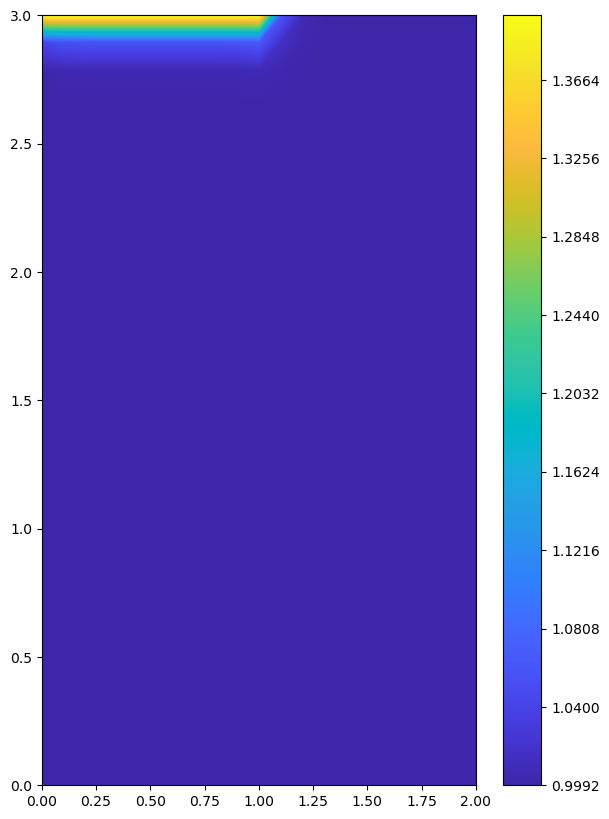

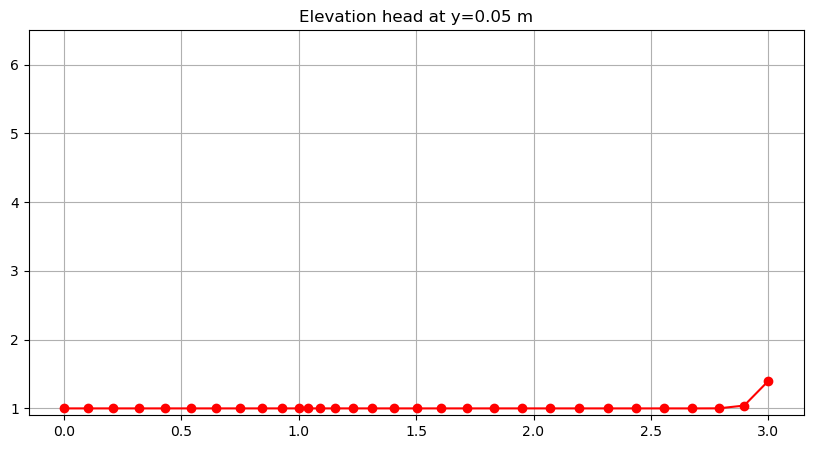

Time 0.04167
Iteration #0001, error L2 relative psi:    1.448161097
Iteration #0002, error L2 relative psi:    0.094454779
Iteration #0003, error L2 relative psi:    0.003640036
Iteration #0004, error L2 relative psi:    0.000382996
Iteration #0005, error L2 relative psi:    0.000089518



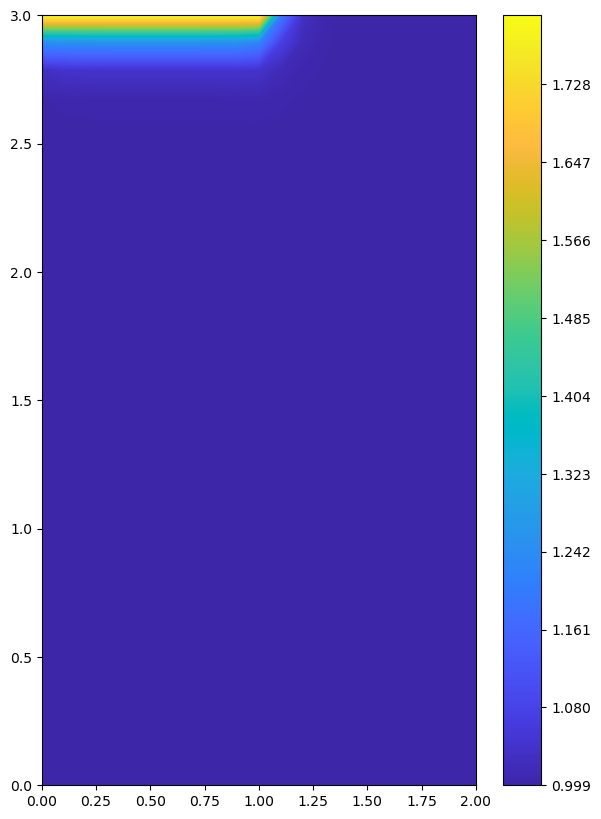

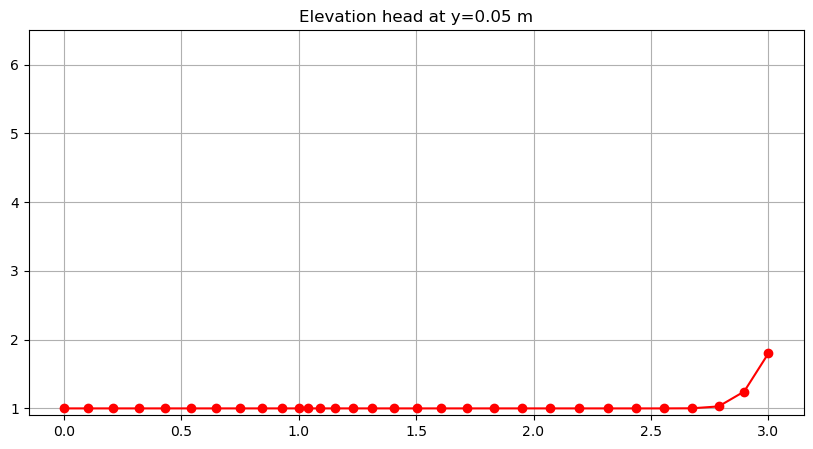

Time 0.0625
Iteration #0001, error L2 relative psi:    1.644498161
Iteration #0002, error L2 relative psi:    0.189492805
Iteration #0003, error L2 relative psi:    0.009967090
Iteration #0004, error L2 relative psi:    0.001672858
Iteration #0005, error L2 relative psi:    0.000217351



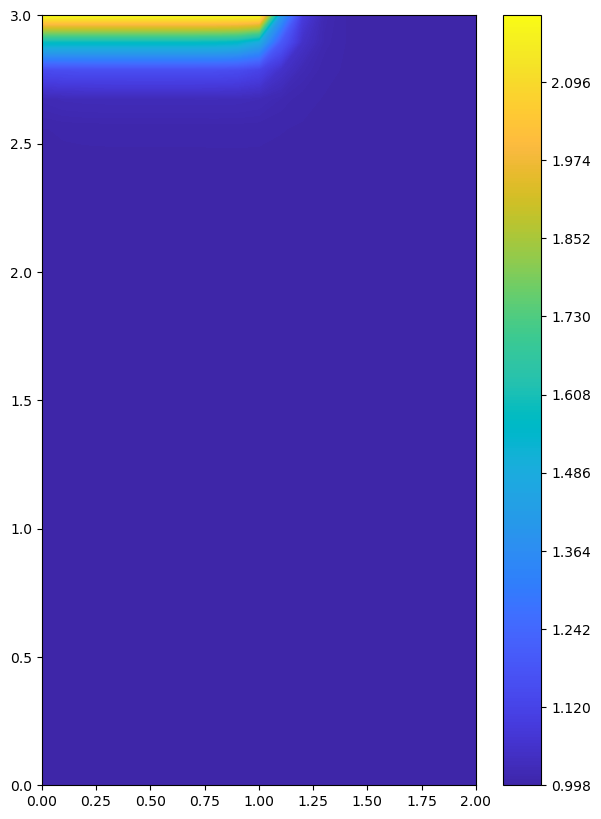

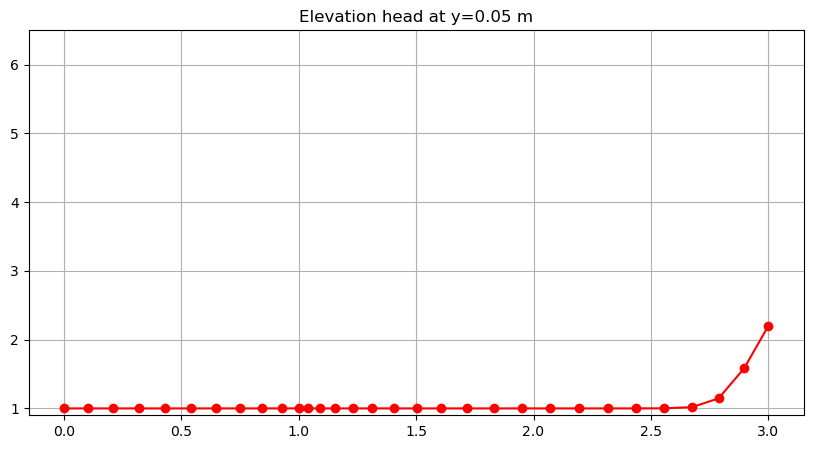

Time 0.08333
Iteration #0001, error L2 relative psi:    0.868682716
Iteration #0002, error L2 relative psi:    0.077069163
Iteration #0003, error L2 relative psi:    0.006115065
Iteration #0004, error L2 relative psi:    0.001062089
Iteration #0005, error L2 relative psi:    0.000232375



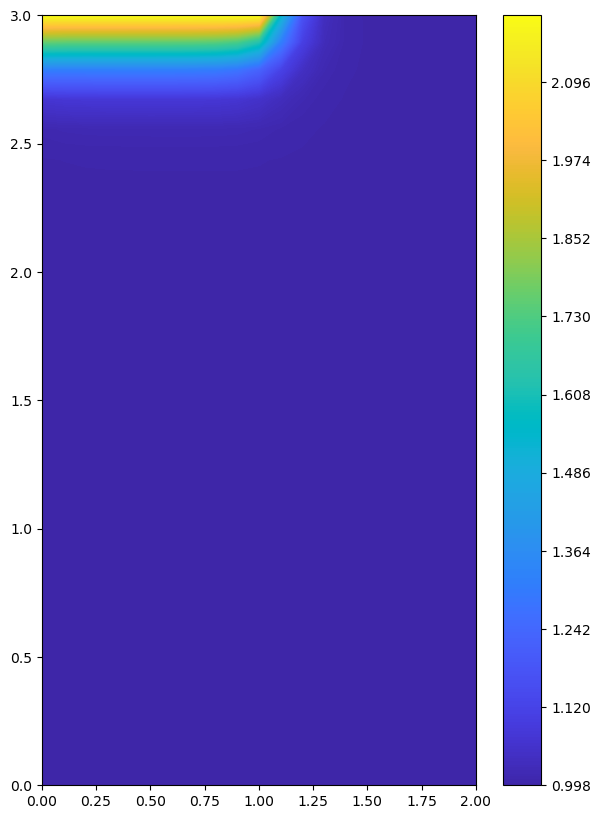

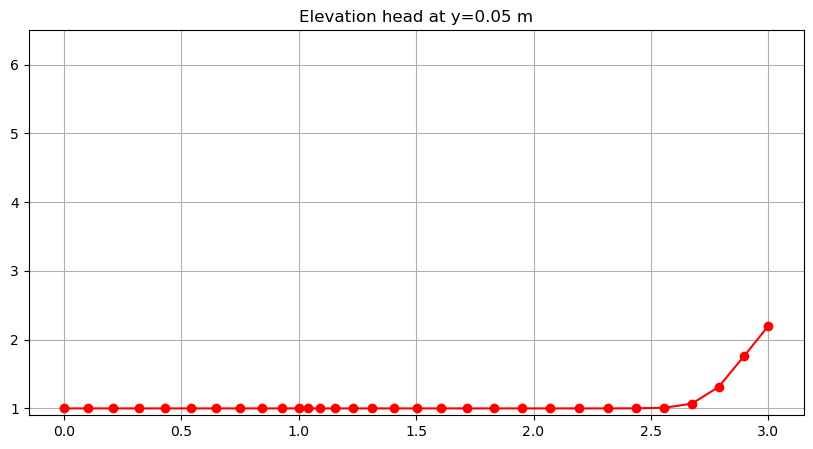

Time 0.10417
Iteration #0001, error L2 relative psi:    0.654109400
Iteration #0002, error L2 relative psi:    0.080523858
Iteration #0003, error L2 relative psi:    0.007944311
Iteration #0004, error L2 relative psi:    0.001274127
Iteration #0005, error L2 relative psi:    0.000277610



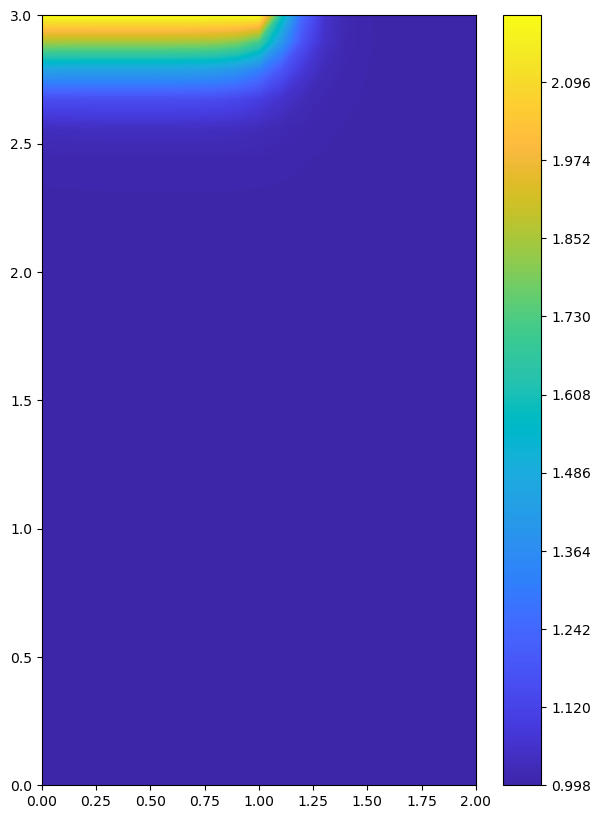

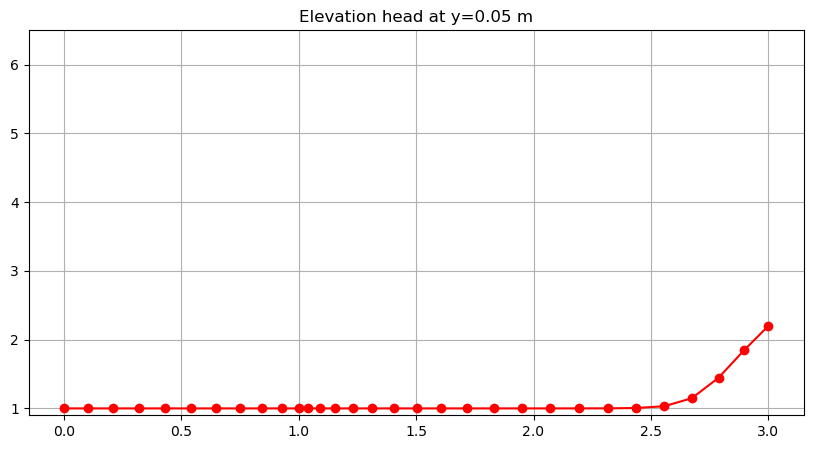

Time 0.125
Iteration #0001, error L2 relative psi:    0.536105707
Iteration #0002, error L2 relative psi:    0.077067144
Iteration #0003, error L2 relative psi:    0.009407417
Iteration #0004, error L2 relative psi:    0.001483651
Iteration #0005, error L2 relative psi:    0.000304601
Iteration #0006, error L2 relative psi:    0.000066063



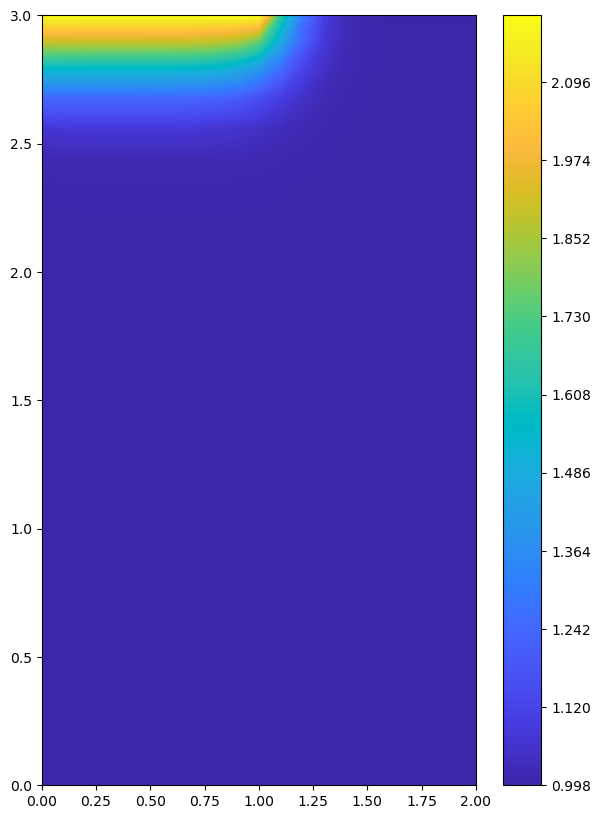

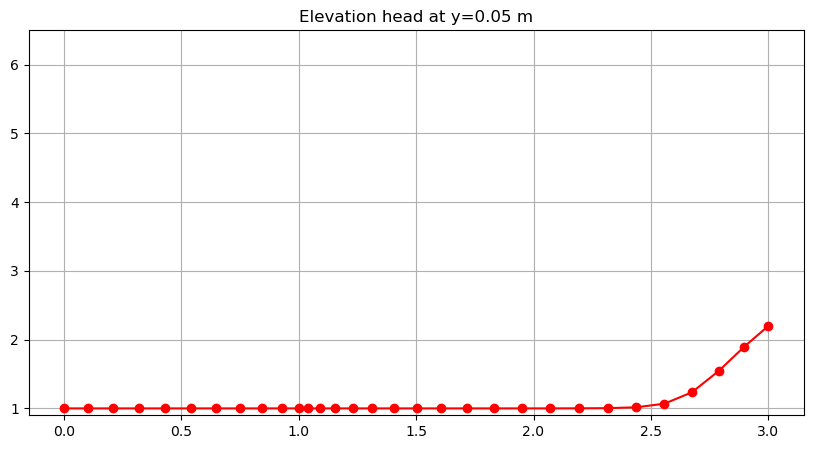

Time 0.14583
Iteration #0001, error L2 relative psi:    0.458198088
Iteration #0002, error L2 relative psi:    0.071115024
Iteration #0003, error L2 relative psi:    0.009835030
Iteration #0004, error L2 relative psi:    0.001600466
Iteration #0005, error L2 relative psi:    0.000320971
Iteration #0006, error L2 relative psi:    0.000068631



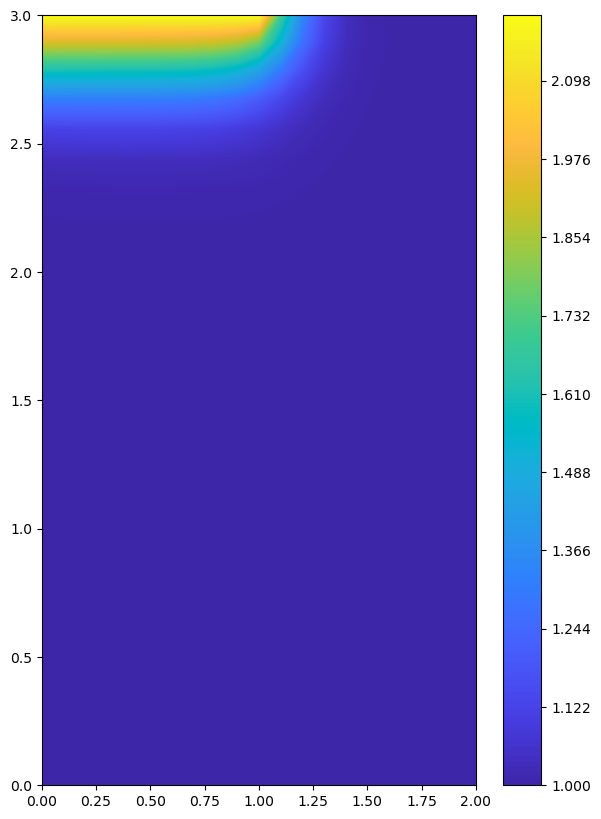

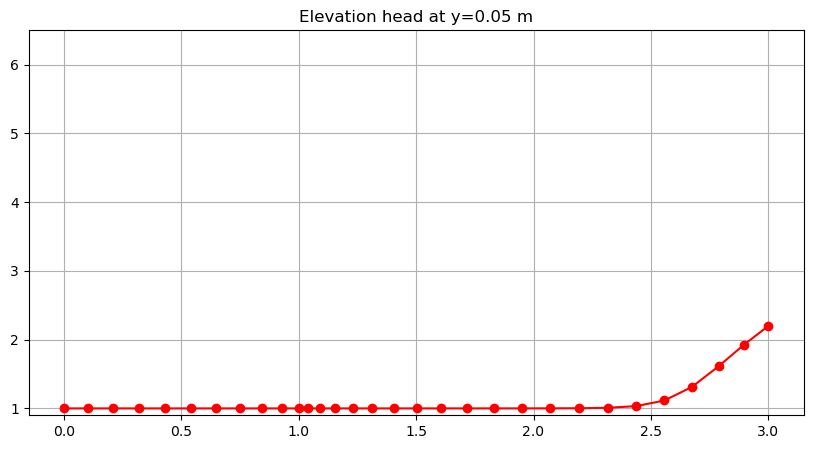

Time 0.16667
Iteration #0001, error L2 relative psi:    0.402112237
Iteration #0002, error L2 relative psi:    0.064897779
Iteration #0003, error L2 relative psi:    0.009670991
Iteration #0004, error L2 relative psi:    0.001626066
Iteration #0005, error L2 relative psi:    0.000332394
Iteration #0006, error L2 relative psi:    0.000080127



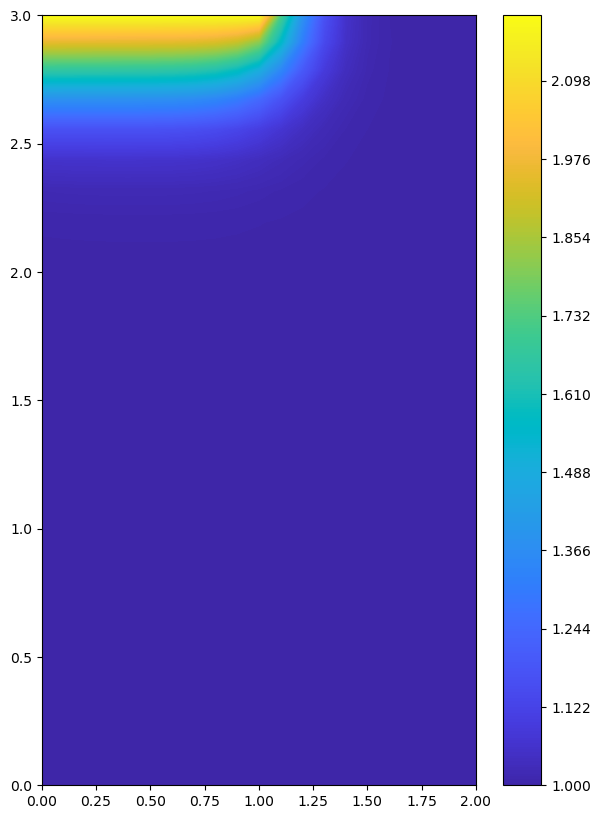

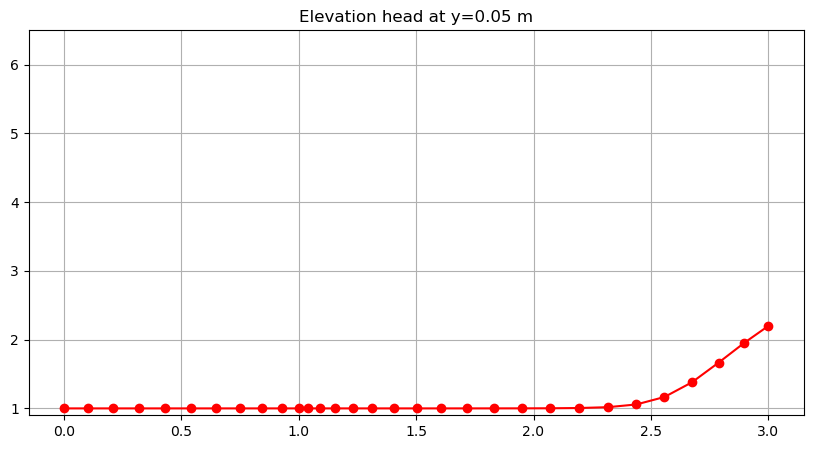

Time 0.1875
Iteration #0001, error L2 relative psi:    0.359451086
Iteration #0002, error L2 relative psi:    0.059048193
Iteration #0003, error L2 relative psi:    0.009223959
Iteration #0004, error L2 relative psi:    0.001593336
Iteration #0005, error L2 relative psi:    0.000353049
Iteration #0006, error L2 relative psi:    0.000123814



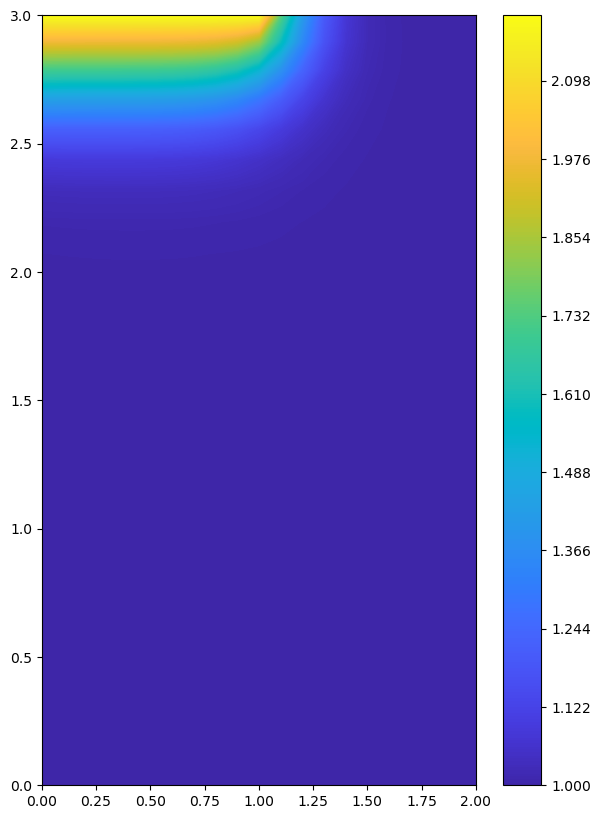

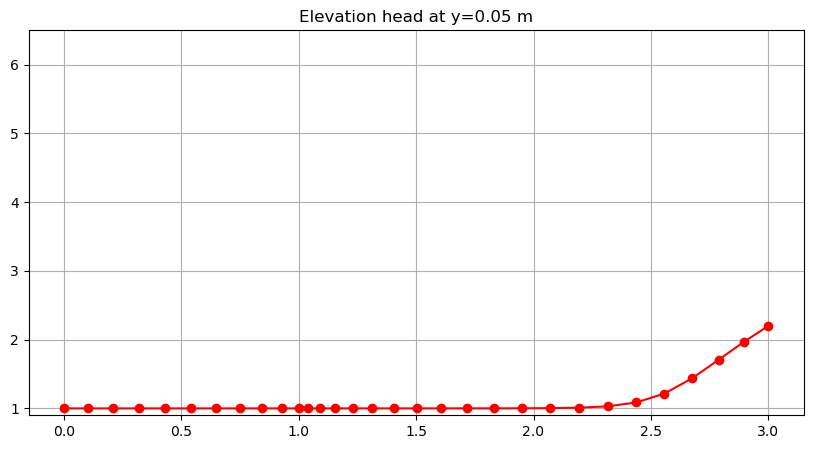

Time 0.20833
Iteration #0001, error L2 relative psi:    0.325729147
Iteration #0002, error L2 relative psi:    0.053721020
Iteration #0003, error L2 relative psi:    0.008668334
Iteration #0004, error L2 relative psi:    0.001536918
Iteration #0005, error L2 relative psi:    0.000411601
Iteration #0006, error L2 relative psi:    0.000222395



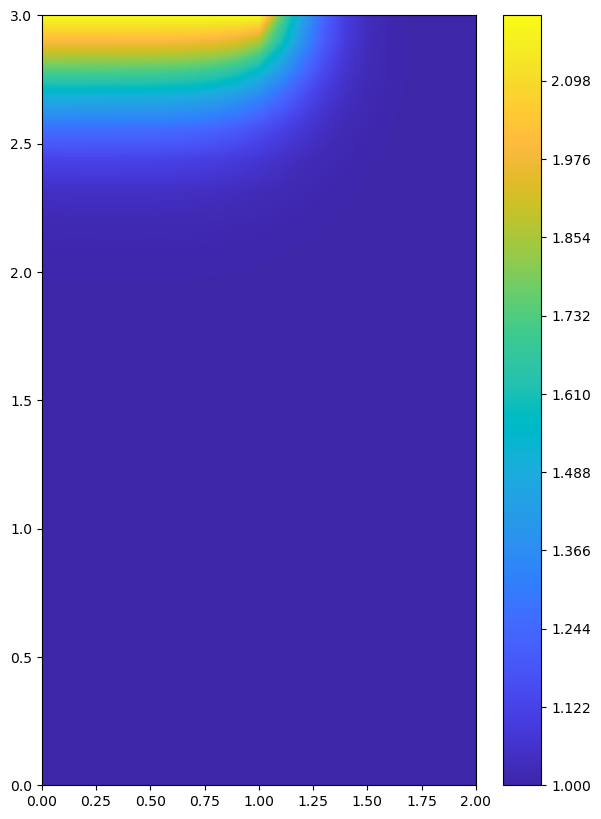

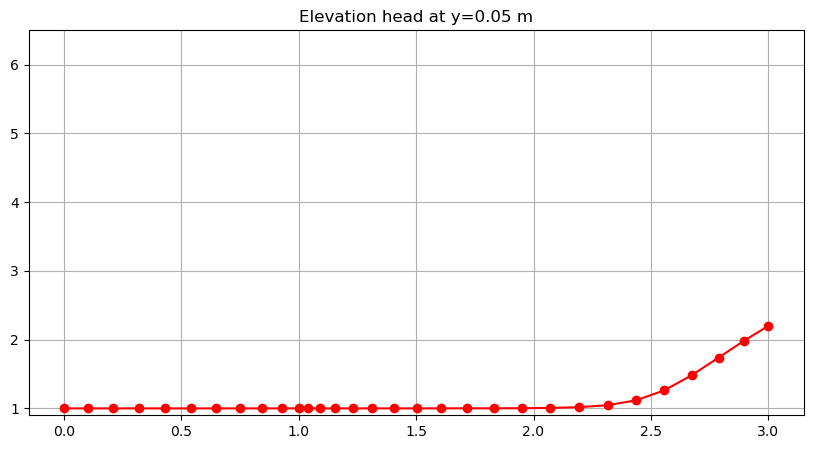

Time 0.22917
Iteration #0001, error L2 relative psi:    0.298298457
Iteration #0002, error L2 relative psi:    0.048921560
Iteration #0003, error L2 relative psi:    0.008102845
Iteration #0004, error L2 relative psi:    0.001497055
Iteration #0005, error L2 relative psi:    0.000547076
Iteration #0006, error L2 relative psi:    0.000391451
Iteration #0007, error L2 relative psi:    0.000358560
Iteration #0008, error L2 relative psi:    0.000326200
Iteration #0009, error L2 relative psi:    0.000298247
Iteration #0010, error L2 relative psi:    0.000272459



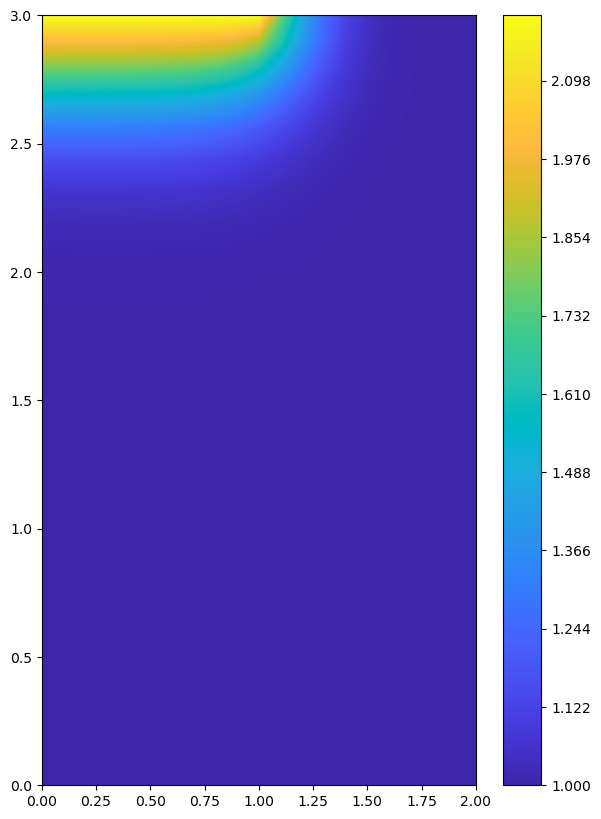

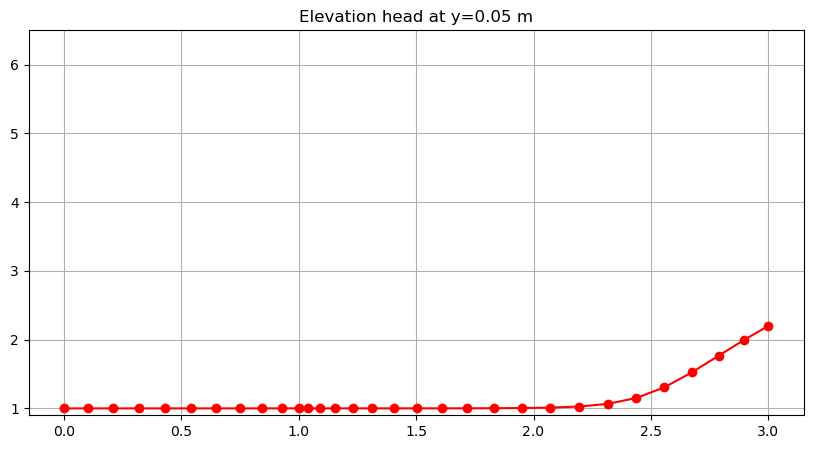

Time 0.25
Iteration #0001, error L2 relative psi:    0.275502224
Iteration #0002, error L2 relative psi:    0.044625823
Iteration #0003, error L2 relative psi:    0.007573145
Iteration #0004, error L2 relative psi:    0.001506260
Iteration #0005, error L2 relative psi:    0.000736459
Iteration #0006, error L2 relative psi:    0.000593967
Iteration #0007, error L2 relative psi:    0.000544568
Iteration #0008, error L2 relative psi:    0.000496403
Iteration #0009, error L2 relative psi:    0.000453739
Iteration #0010, error L2 relative psi:    0.000414542
Iteration #0011, error L2 relative psi:    0.000378795
Iteration #0012, error L2 relative psi:    0.000346130
Iteration #0013, error L2 relative psi:    0.000316291
Iteration #0014, error L2 relative psi:    0.000289029



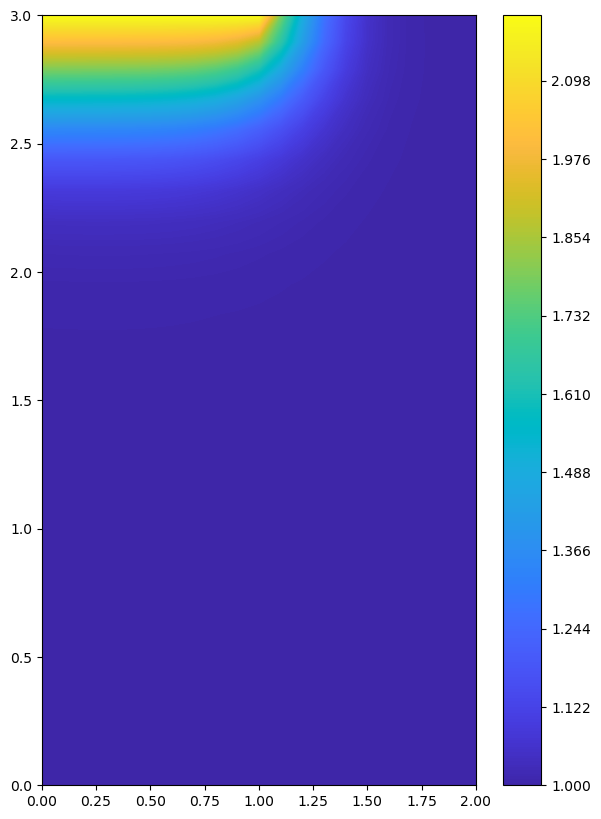

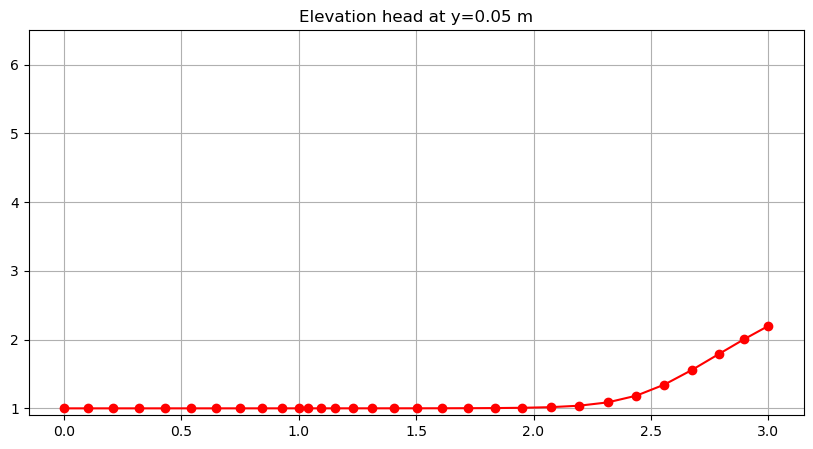

Time 0.27083
Iteration #0001, error L2 relative psi:    0.256227679
Iteration #0002, error L2 relative psi:    0.040788032
Iteration #0003, error L2 relative psi:    0.007111711
Iteration #0004, error L2 relative psi:    0.001591203
Iteration #0005, error L2 relative psi:    0.000979151
Iteration #0006, error L2 relative psi:    0.000835406
Iteration #0007, error L2 relative psi:    0.000765484
Iteration #0008, error L2 relative psi:    0.000698426
Iteration #0009, error L2 relative psi:    0.000638308
Iteration #0010, error L2 relative psi:    0.000583194
Iteration #0011, error L2 relative psi:    0.000532903
Iteration #0012, error L2 relative psi:    0.000486954
Iteration #0013, error L2 relative psi:    0.000444979
Iteration #0014, error L2 relative psi:    0.000406628
Iteration #0015, error L2 relative psi:    0.000371588
Iteration #0016, error L2 relative psi:    0.000339570
Iteration #0017, error L2 relative psi:    0.000310314
Iteration #0018, error L2 relative psi:    0.0002835

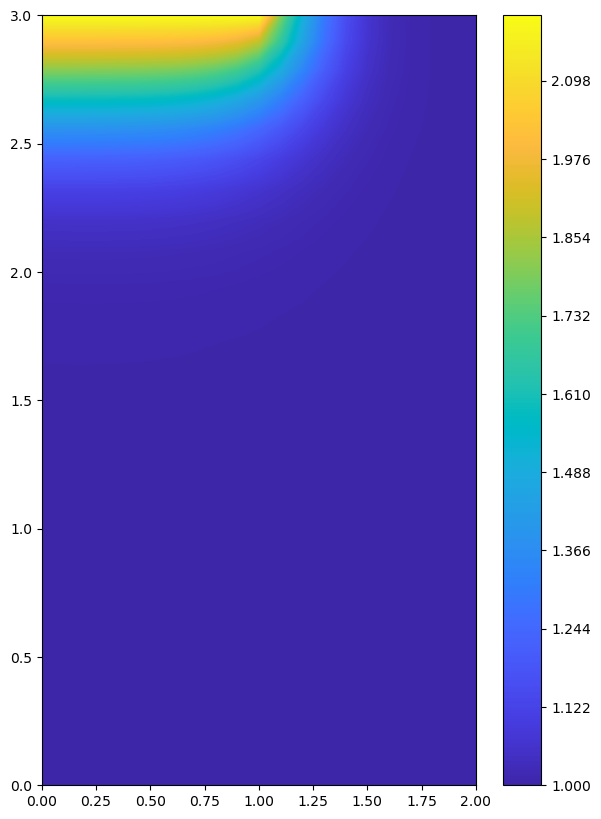

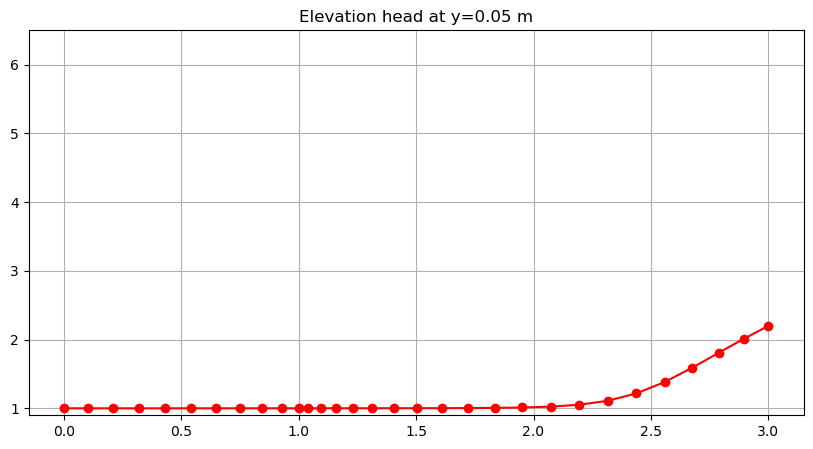

Time 0.29167
Iteration #0001, error L2 relative psi:    0.239701674
Iteration #0002, error L2 relative psi:    0.037366168
Iteration #0003, error L2 relative psi:    0.006741183
Iteration #0004, error L2 relative psi:    0.001771055
Iteration #0005, error L2 relative psi:    0.001278394
Iteration #0006, error L2 relative psi:    0.001122495
Iteration #0007, error L2 relative psi:    0.001027882
Iteration #0008, error L2 relative psi:    0.000938304
Iteration #0009, error L2 relative psi:    0.000857469
Iteration #0010, error L2 relative psi:    0.000783452
Iteration #0011, error L2 relative psi:    0.000715892
Iteration #0012, error L2 relative psi:    0.000654168
Iteration #0013, error L2 relative psi:    0.000597782
Iteration #0014, error L2 relative psi:    0.000546264
Iteration #0015, error L2 relative psi:    0.000499193
Iteration #0016, error L2 relative psi:    0.000456182
Iteration #0017, error L2 relative psi:    0.000416879
Iteration #0018, error L2 relative psi:    0.0003809

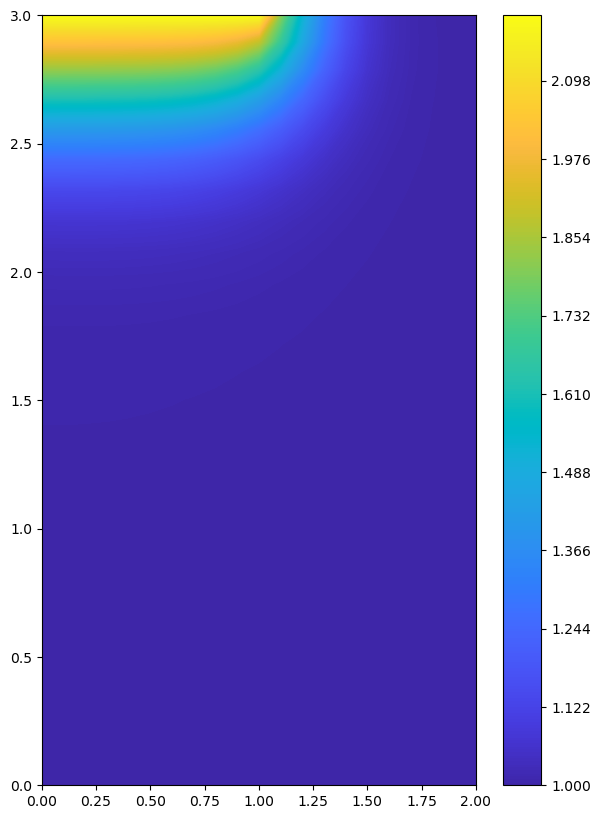

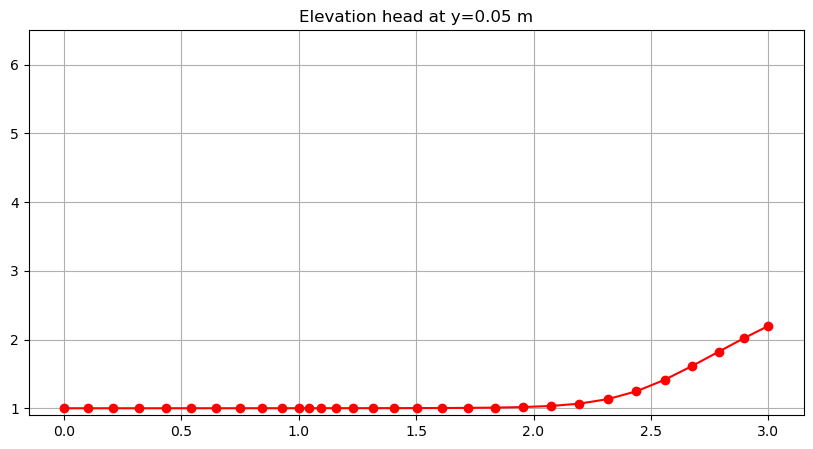

Time 0.3125
Iteration #0001, error L2 relative psi:    0.225366334
Iteration #0002, error L2 relative psi:    0.034324761
Iteration #0003, error L2 relative psi:    0.006483627
Iteration #0004, error L2 relative psi:    0.002060388
Iteration #0005, error L2 relative psi:    0.001645648
Iteration #0006, error L2 relative psi:    0.001467938
Iteration #0007, error L2 relative psi:    0.001343532
Iteration #0008, error L2 relative psi:    0.001226809
Iteration #0009, error L2 relative psi:    0.001121065
Iteration #0010, error L2 relative psi:    0.001024309
Iteration #0011, error L2 relative psi:    0.000935978
Iteration #0012, error L2 relative psi:    0.000855280
Iteration #0013, error L2 relative psi:    0.000781558
Iteration #0014, error L2 relative psi:    0.000714201
Iteration #0015, error L2 relative psi:    0.000652657
Iteration #0016, error L2 relative psi:    0.000596421
Iteration #0017, error L2 relative psi:    0.000545035
Iteration #0018, error L2 relative psi:    0.00049807

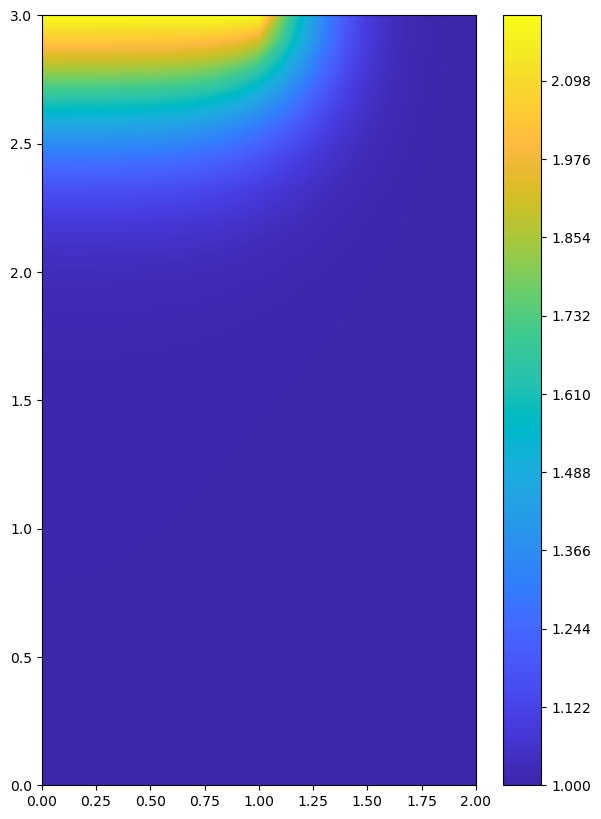

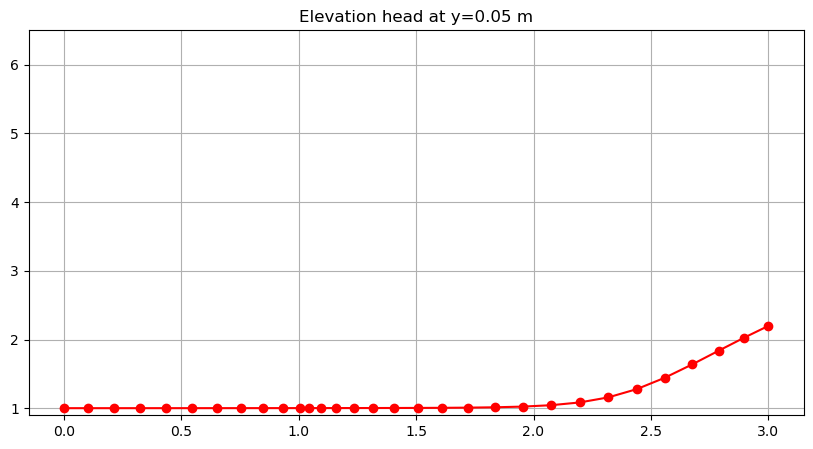

Time 0.33333
Iteration #0001, error L2 relative psi:    0.212814577
Iteration #0002, error L2 relative psi:    0.031642859
Iteration #0003, error L2 relative psi:    0.006346695
Iteration #0004, error L2 relative psi:    0.002441452
Iteration #0005, error L2 relative psi:    0.002065453
Iteration #0006, error L2 relative psi:    0.001858646
Iteration #0007, error L2 relative psi:    0.001700521
Iteration #0008, error L2 relative psi:    0.001553058
Iteration #0009, error L2 relative psi:    0.001419146
Iteration #0010, error L2 relative psi:    0.001296671
Iteration #0011, error L2 relative psi:    0.001184844
Iteration #0012, error L2 relative psi:    0.001082682
Iteration #0013, error L2 relative psi:    0.000989350
Iteration #0014, error L2 relative psi:    0.000904076
Iteration #0015, error L2 relative psi:    0.000826161
Iteration #0016, error L2 relative psi:    0.000754966
Iteration #0017, error L2 relative psi:    0.000689910
Iteration #0018, error L2 relative psi:    0.0006304

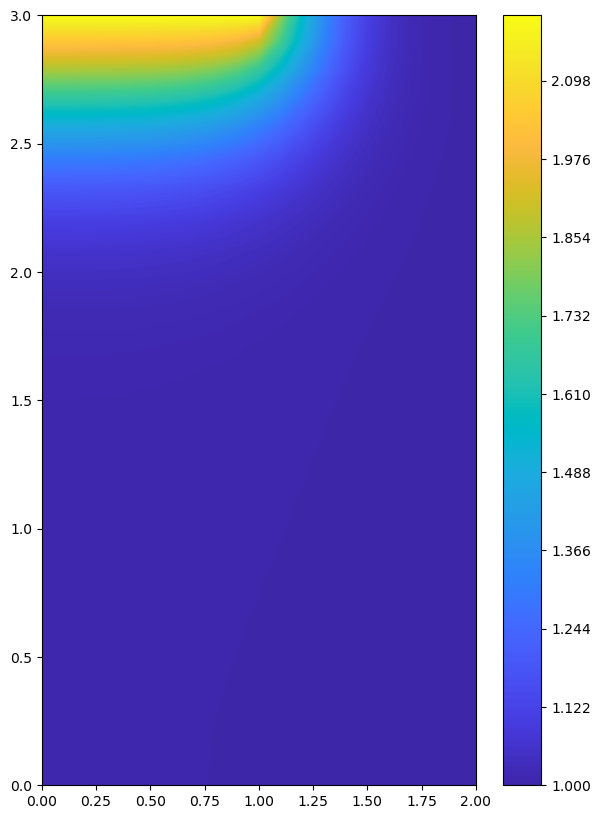

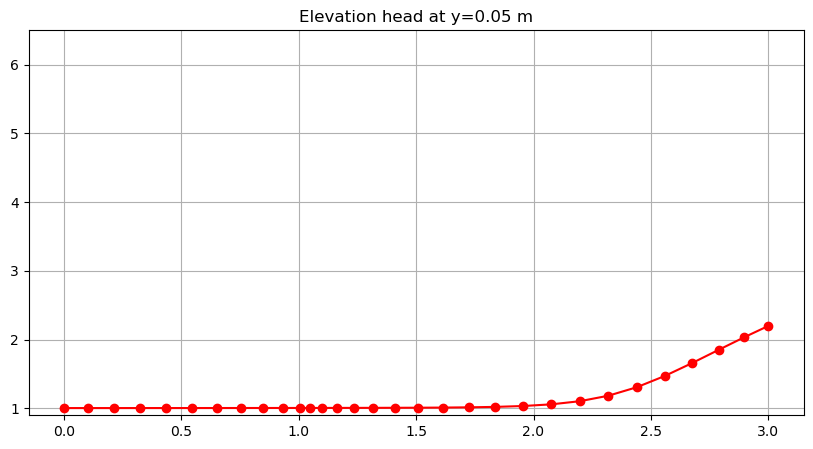

Time 0.35417
Iteration #0001, error L2 relative psi:    0.201735823
Iteration #0002, error L2 relative psi:    0.029303790
Iteration #0003, error L2 relative psi:    0.006332662
Iteration #0004, error L2 relative psi:    0.002893174
Iteration #0005, error L2 relative psi:    0.002526705
Iteration #0006, error L2 relative psi:    0.002285348
Iteration #0007, error L2 relative psi:    0.002090395
Iteration #0008, error L2 relative psi:    0.001909328
Iteration #0009, error L2 relative psi:    0.001744645
Iteration #0010, error L2 relative psi:    0.001594069
Iteration #0011, error L2 relative psi:    0.001456570
Iteration #0012, error L2 relative psi:    0.001330955
Iteration #0013, error L2 relative psi:    0.001216197
Iteration #0014, error L2 relative psi:    0.001111348
Iteration #0015, error L2 relative psi:    0.001015547
Iteration #0016, error L2 relative psi:    0.000928010
Iteration #0017, error L2 relative psi:    0.000848022
Iteration #0018, error L2 relative psi:    0.0007749

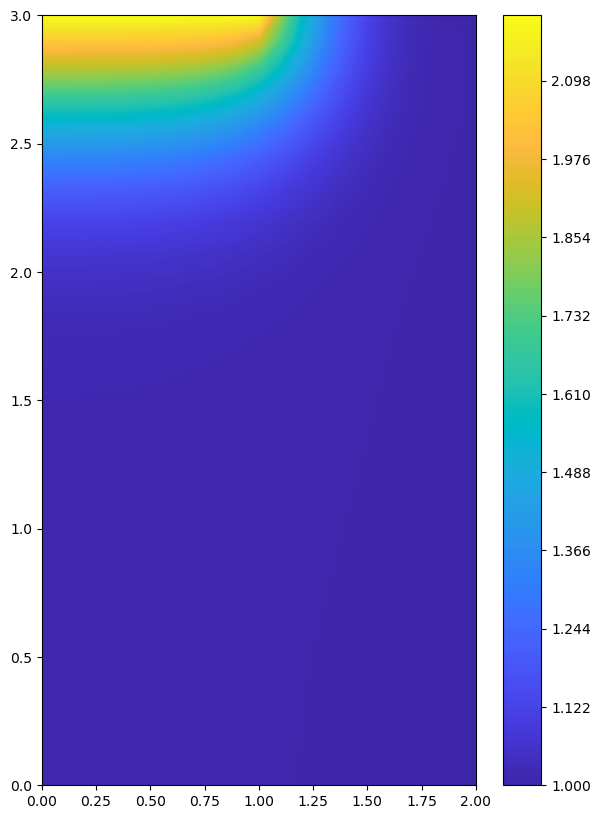

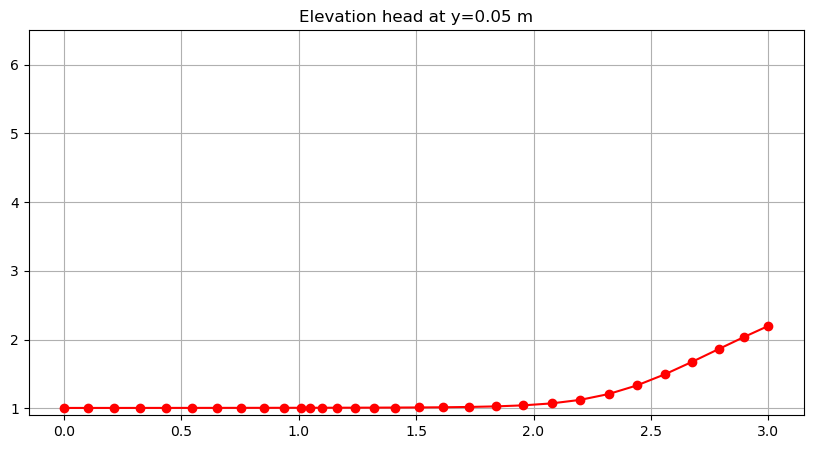

Time 0.375
Iteration #0001, error L2 relative psi:    0.191885340
Iteration #0002, error L2 relative psi:    0.027293519
Iteration #0003, error L2 relative psi:    0.006445031
Iteration #0004, error L2 relative psi:    0.003407712
Iteration #0005, error L2 relative psi:    0.003030422
Iteration #0006, error L2 relative psi:    0.002749579
Iteration #0007, error L2 relative psi:    0.002514561
Iteration #0008, error L2 relative psi:    0.002296898
Iteration #0009, error L2 relative psi:    0.002098719
Iteration #0010, error L2 relative psi:    0.001917549
Iteration #0011, error L2 relative psi:    0.001752102
Iteration #0012, error L2 relative psi:    0.001600955
Iteration #0013, error L2 relative psi:    0.001462872
Iteration #0014, error L2 relative psi:    0.001336712
Iteration #0015, error L2 relative psi:    0.001221442
Iteration #0016, error L2 relative psi:    0.001116118
Iteration #0017, error L2 relative psi:    0.001019878
Iteration #0018, error L2 relative psi:    0.000931939

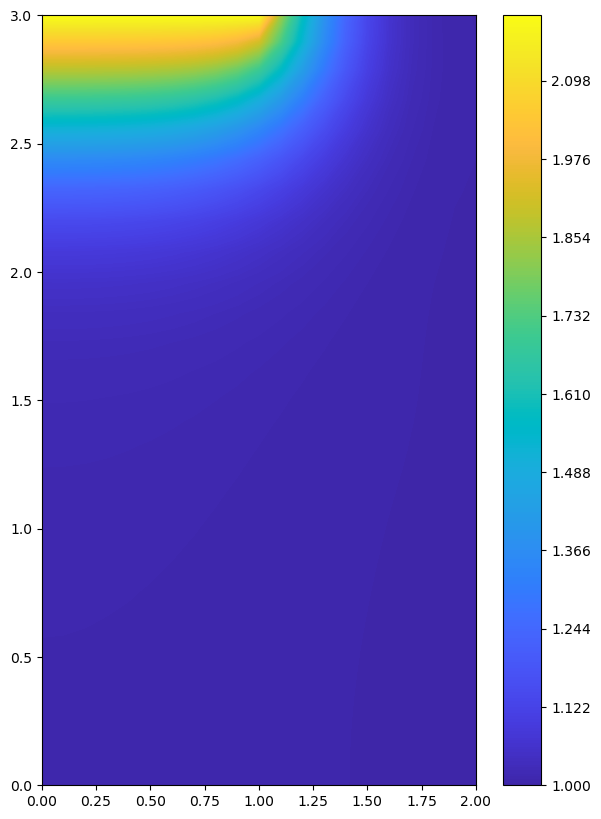

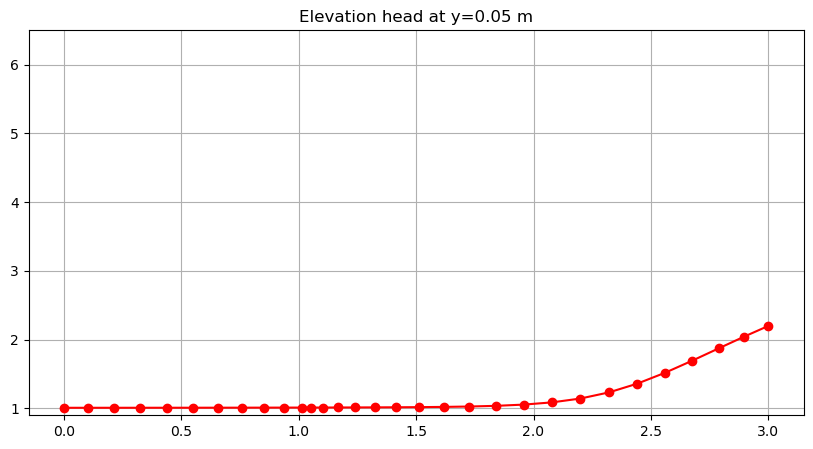

Time 0.39583
Iteration #0001, error L2 relative psi:    0.183073094
Iteration #0002, error L2 relative psi:    0.025601799
Iteration #0003, error L2 relative psi:    0.006664319
Iteration #0004, error L2 relative psi:    0.003956310
Iteration #0005, error L2 relative psi:    0.003554778
Iteration #0006, error L2 relative psi:    0.003231712
Iteration #0007, error L2 relative psi:    0.002955066
Iteration #0008, error L2 relative psi:    0.002699351
Iteration #0009, error L2 relative psi:    0.002466350
Iteration #0010, error L2 relative psi:    0.002253375
Iteration #0011, error L2 relative psi:    0.002058872
Iteration #0012, error L2 relative psi:    0.001881184
Iteration #0013, error L2 relative psi:    0.001718855
Iteration #0014, error L2 relative psi:    0.001570547
Iteration #0015, error L2 relative psi:    0.001435043
Iteration #0016, error L2 relative psi:    0.001311235
Iteration #0017, error L2 relative psi:    0.001198110
Iteration #0018, error L2 relative psi:    0.0010947

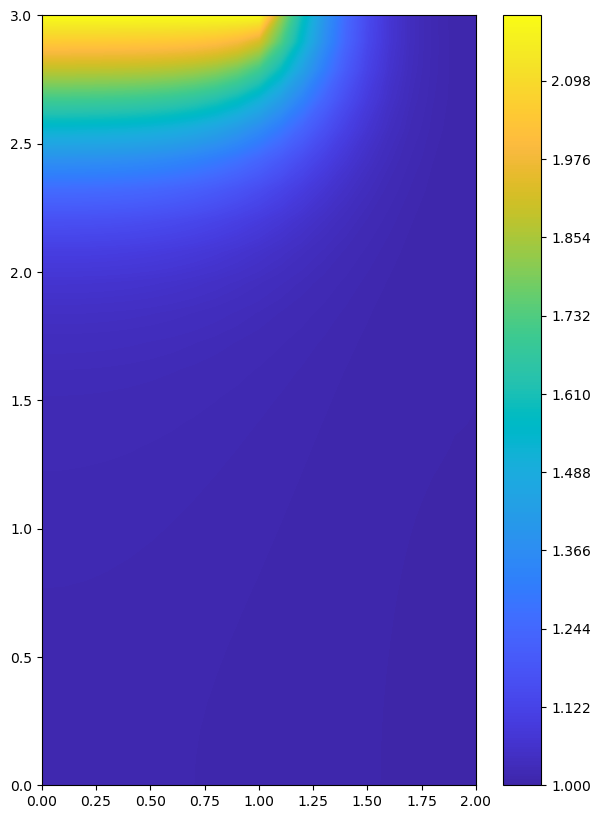

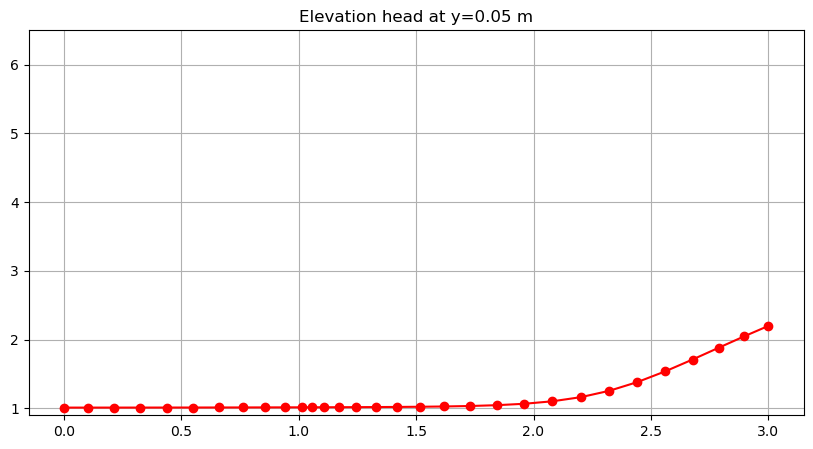

Time 0.41667
Iteration #0001, error L2 relative psi:    0.175143800
Iteration #0002, error L2 relative psi:    0.024214317
Iteration #0003, error L2 relative psi:    0.006969560
Iteration #0004, error L2 relative psi:    0.004520828
Iteration #0005, error L2 relative psi:    0.004086794
Iteration #0006, error L2 relative psi:    0.003720132
Iteration #0007, error L2 relative psi:    0.003401276
Iteration #0008, error L2 relative psi:    0.003106957
Iteration #0009, error L2 relative psi:    0.002838635
Iteration #0010, error L2 relative psi:    0.002593395
Iteration #0011, error L2 relative psi:    0.002369421
Iteration #0012, error L2 relative psi:    0.002164813
Iteration #0013, error L2 relative psi:    0.001977896
Iteration #0014, error L2 relative psi:    0.001807128
Iteration #0015, error L2 relative psi:    0.001651111
Iteration #0016, error L2 relative psi:    0.001508566
Iteration #0017, error L2 relative psi:    0.001378327
Iteration #0018, error L2 relative psi:    0.0012593

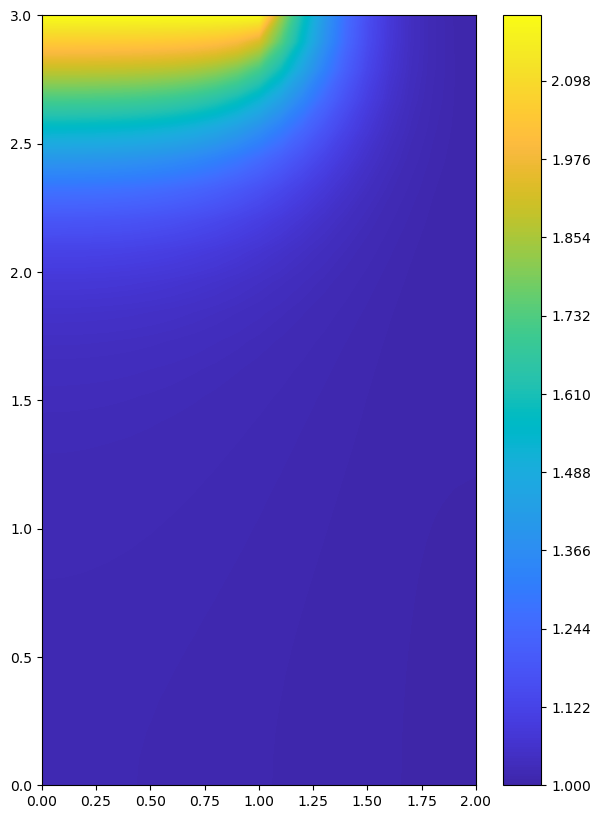

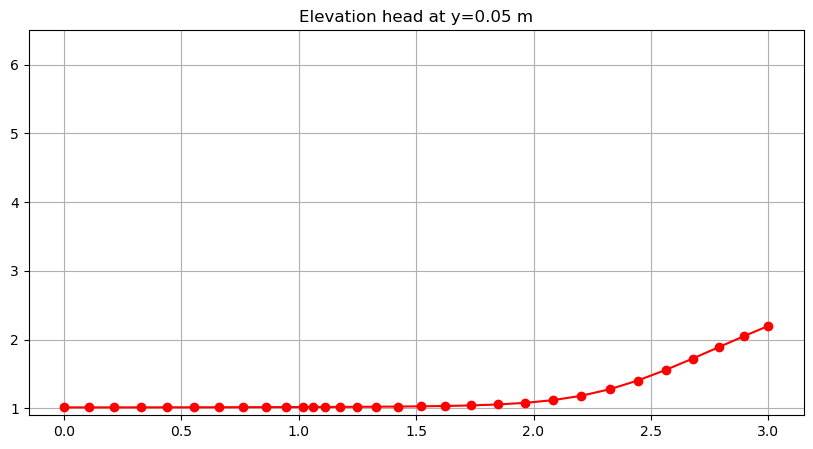

Time 0.4375
Iteration #0001, error L2 relative psi:    0.167967486
Iteration #0002, error L2 relative psi:    0.023113997
Iteration #0003, error L2 relative psi:    0.007349414
Iteration #0004, error L2 relative psi:    0.005099613
Iteration #0005, error L2 relative psi:    0.004627475
Iteration #0006, error L2 relative psi:    0.004215933
Iteration #0007, error L2 relative psi:    0.003854177
Iteration #0008, error L2 relative psi:    0.003520605
Iteration #0009, error L2 relative psi:    0.003216373
Iteration #0010, error L2 relative psi:    0.002938331
Iteration #0011, error L2 relative psi:    0.002684396
Iteration #0012, error L2 relative psi:    0.002452426
Iteration #0013, error L2 relative psi:    0.002240518
Iteration #0014, error L2 relative psi:    0.002046928
Iteration #0015, error L2 relative psi:    0.001870069
Iteration #0016, error L2 relative psi:    0.001708490
Iteration #0017, error L2 relative psi:    0.001560871
Iteration #0018, error L2 relative psi:    0.00142600

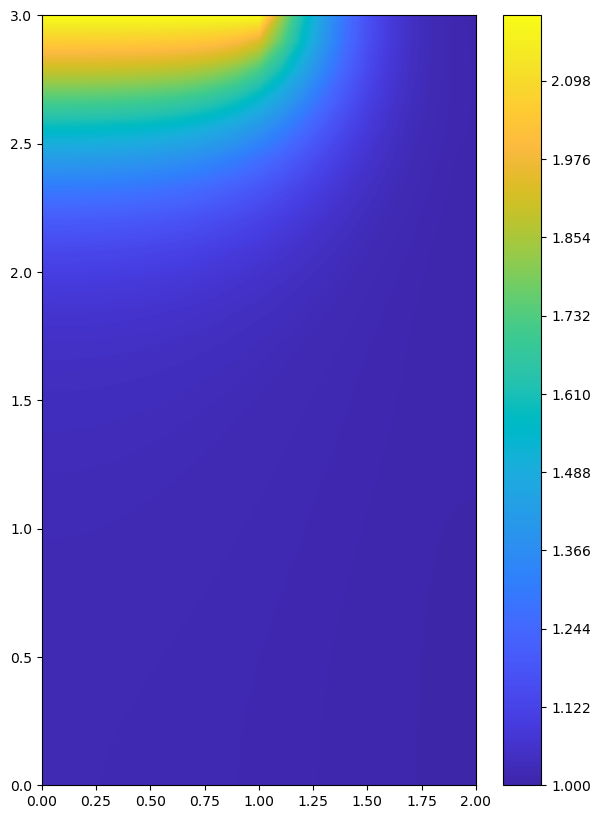

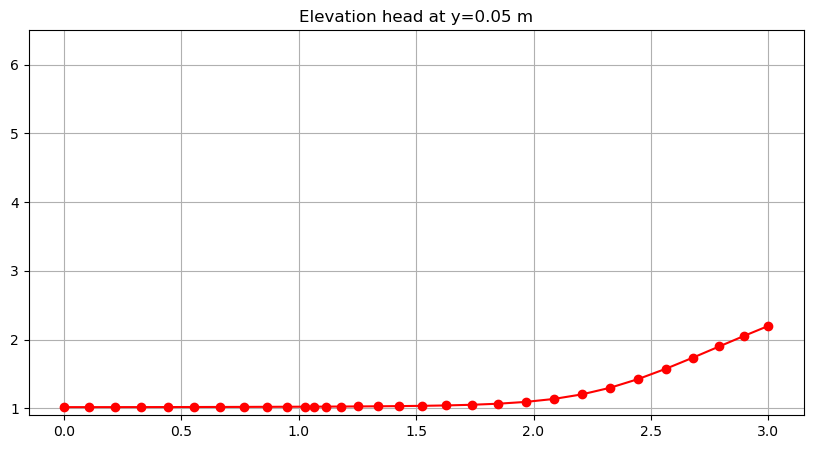

Time 0.45833
Iteration #0001, error L2 relative psi:    0.161442528
Iteration #0002, error L2 relative psi:    0.022273529
Iteration #0003, error L2 relative psi:    0.007759783
Iteration #0004, error L2 relative psi:    0.005655516
Iteration #0005, error L2 relative psi:    0.005143786
Iteration #0006, error L2 relative psi:    0.004689009
Iteration #0007, error L2 relative psi:    0.004286241
Iteration #0008, error L2 relative psi:    0.003915134
Iteration #0009, error L2 relative psi:    0.003576564
Iteration #0010, error L2 relative psi:    0.003267159
Iteration #0011, error L2 relative psi:    0.002984580
Iteration #0012, error L2 relative psi:    0.002726454
Iteration #0013, error L2 relative psi:    0.002490665
Iteration #0014, error L2 relative psi:    0.002275270
Iteration #0015, error L2 relative psi:    0.002078501
Iteration #0016, error L2 relative psi:    0.001898746
Iteration #0017, error L2 relative psi:    0.001734533
Iteration #0018, error L2 relative psi:    0.0015845

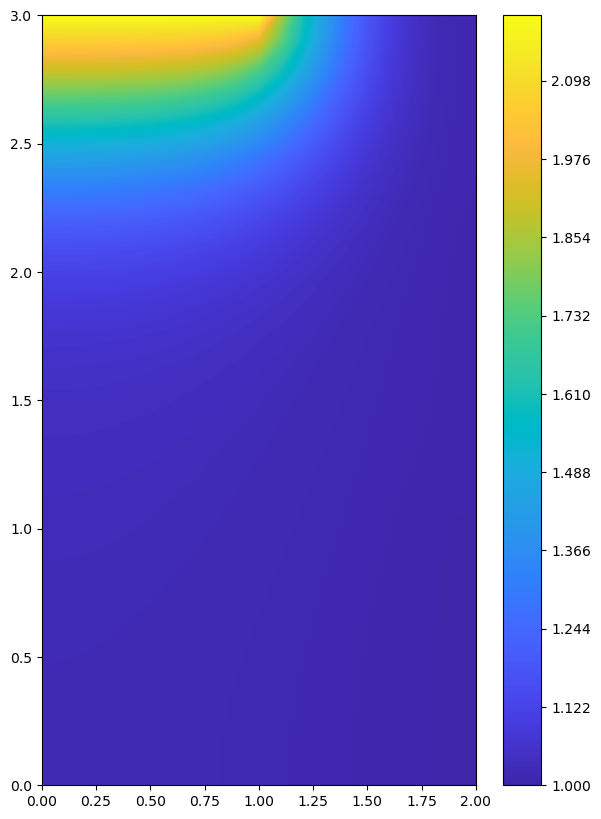

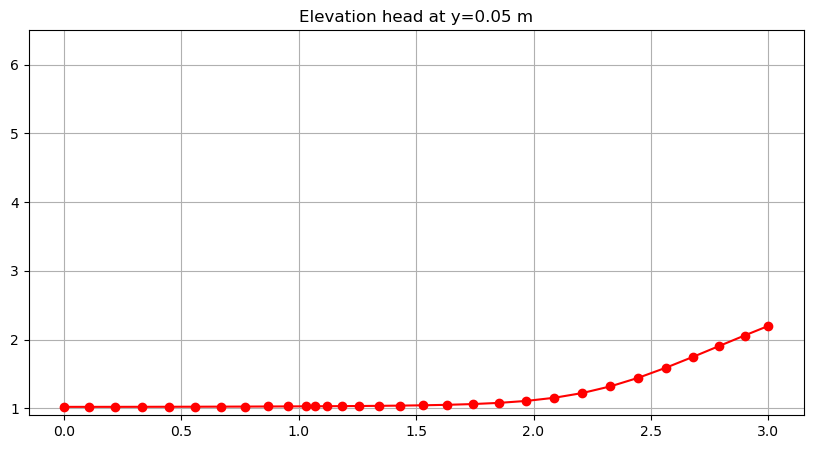

Time 0.47917
Iteration #0001, error L2 relative psi:    0.155476695
Iteration #0002, error L2 relative psi:    0.021666448
Iteration #0003, error L2 relative psi:    0.008200874
Iteration #0004, error L2 relative psi:    0.006201194
Iteration #0005, error L2 relative psi:    0.005648547
Iteration #0006, error L2 relative psi:    0.005151173
Iteration #0007, error L2 relative psi:    0.004708257
Iteration #0008, error L2 relative psi:    0.004300399
Iteration #0009, error L2 relative psi:    0.003928212
Iteration #0010, error L2 relative psi:    0.003588103
Iteration #0011, error L2 relative psi:    0.003277489
Iteration #0012, error L2 relative psi:    0.002993766
Iteration #0013, error L2 relative psi:    0.002734609
Iteration #0014, error L2 relative psi:    0.002497883
Iteration #0015, error L2 relative psi:    0.002281644
Iteration #0016, error L2 relative psi:    0.002084117
Iteration #0017, error L2 relative psi:    0.001903684
Iteration #0018, error L2 relative psi:    0.0017388

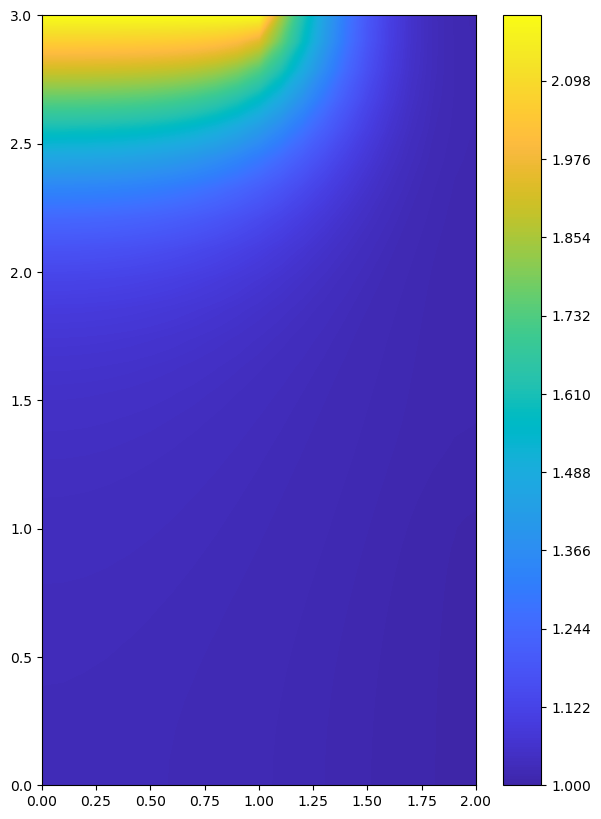

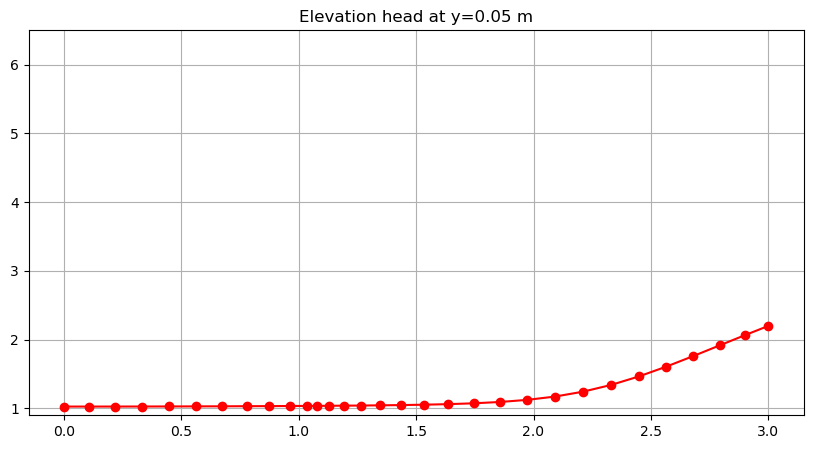

Time 0.5
Iteration #0001, error L2 relative psi:    0.149997402
Iteration #0002, error L2 relative psi:    0.021256475
Iteration #0003, error L2 relative psi:    0.008645536
Iteration #0004, error L2 relative psi:    0.006717483
Iteration #0005, error L2 relative psi:    0.006124635
Iteration #0006, error L2 relative psi:    0.005586827
Iteration #0007, error L2 relative psi:    0.005105971
Iteration #0008, error L2 relative psi:    0.004663381
Iteration #0009, error L2 relative psi:    0.004259424
Iteration #0010, error L2 relative psi:    0.003890303
Iteration #0011, error L2 relative psi:    0.003553201
Iteration #0012, error L2 relative psi:    0.003245301
Iteration #0013, error L2 relative psi:    0.002964077
Iteration #0014, error L2 relative psi:    0.002707213
Iteration #0015, error L2 relative psi:    0.002472597
Iteration #0016, error L2 relative psi:    0.002258302
Iteration #0017, error L2 relative psi:    0.002062568
Iteration #0018, error L2 relative psi:    0.001883790
I

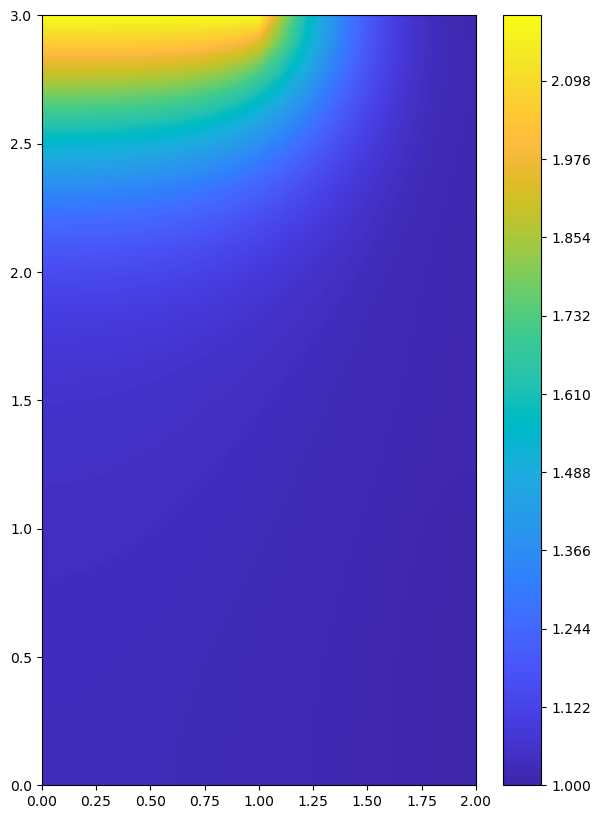

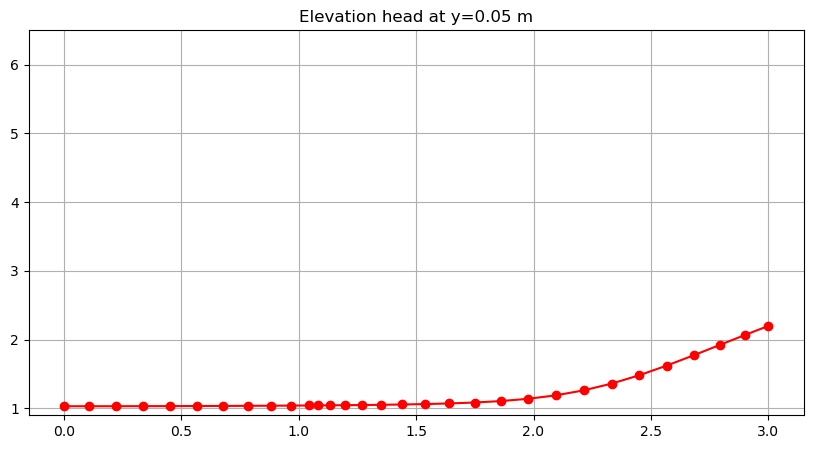

Time 0.52083
Iteration #0001, error L2 relative psi:    0.144940598
Iteration #0002, error L2 relative psi:    0.021011657
Iteration #0003, error L2 relative psi:    0.009091433
Iteration #0004, error L2 relative psi:    0.007209931
Iteration #0005, error L2 relative psi:    0.006577580
Iteration #0006, error L2 relative psi:    0.006001072
Iteration #0007, error L2 relative psi:    0.005484051
Iteration #0008, error L2 relative psi:    0.005008353
Iteration #0009, error L2 relative psi:    0.004574115
Iteration #0010, error L2 relative psi:    0.004177344
Iteration #0011, error L2 relative psi:    0.003815002
Iteration #0012, error L2 relative psi:    0.003484068
Iteration #0013, error L2 relative psi:    0.003181826
Iteration #0014, error L2 relative psi:    0.002905785
Iteration #0015, error L2 relative psi:    0.002653674
Iteration #0016, error L2 relative psi:    0.002423421
Iteration #0017, error L2 relative psi:    0.002213130
Iteration #0018, error L2 relative psi:    0.0020210

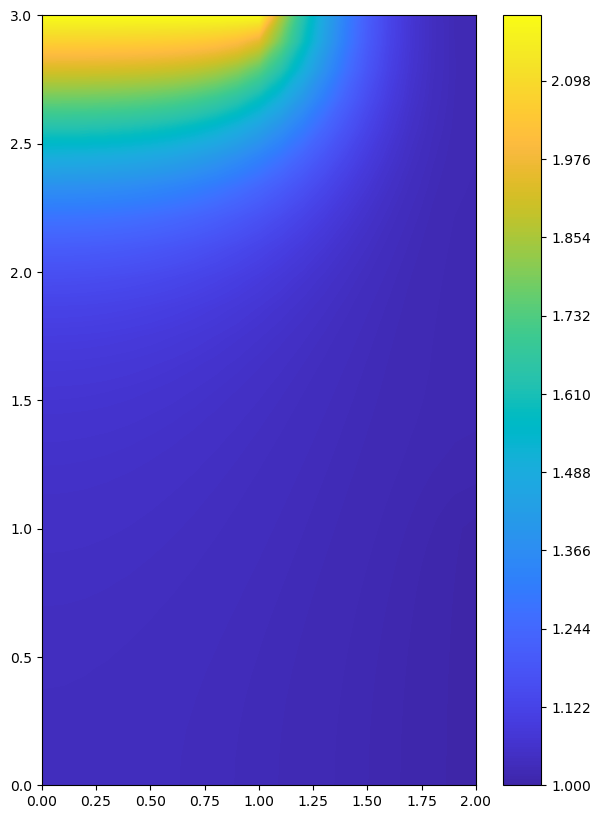

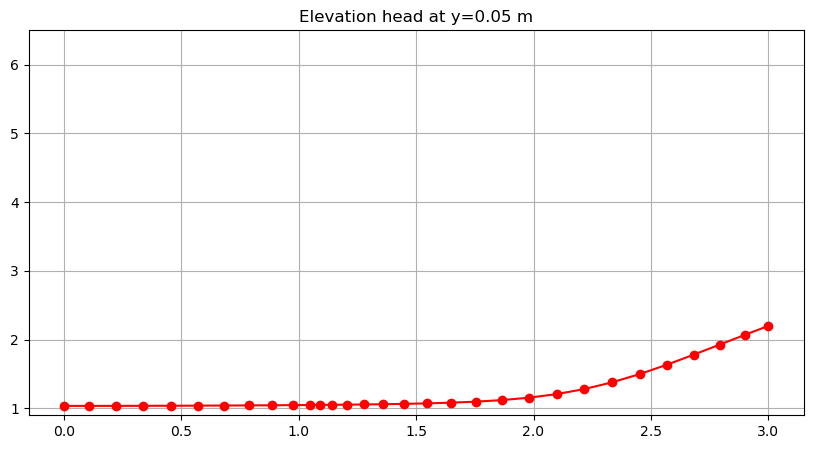

Time 0.54167
Iteration #0001, error L2 relative psi:    0.140257329
Iteration #0002, error L2 relative psi:    0.020885352
Iteration #0003, error L2 relative psi:    0.009501808
Iteration #0004, error L2 relative psi:    0.007647571
Iteration #0005, error L2 relative psi:    0.006979152
Iteration #0006, error L2 relative psi:    0.006368144
Iteration #0007, error L2 relative psi:    0.005818970
Iteration #0008, error L2 relative psi:    0.005313838
Iteration #0009, error L2 relative psi:    0.004852681
Iteration #0010, error L2 relative psi:    0.004431332
Iteration #0011, error L2 relative psi:    0.004046559
Iteration #0012, error L2 relative psi:    0.003695160
Iteration #0013, error L2 relative psi:    0.003374250
Iteration #0014, error L2 relative psi:    0.003081182
Iteration #0015, error L2 relative psi:    0.002813544
Iteration #0016, error L2 relative psi:    0.002569132
Iteration #0017, error L2 relative psi:    0.002345932
Iteration #0018, error L2 relative psi:    0.0021421

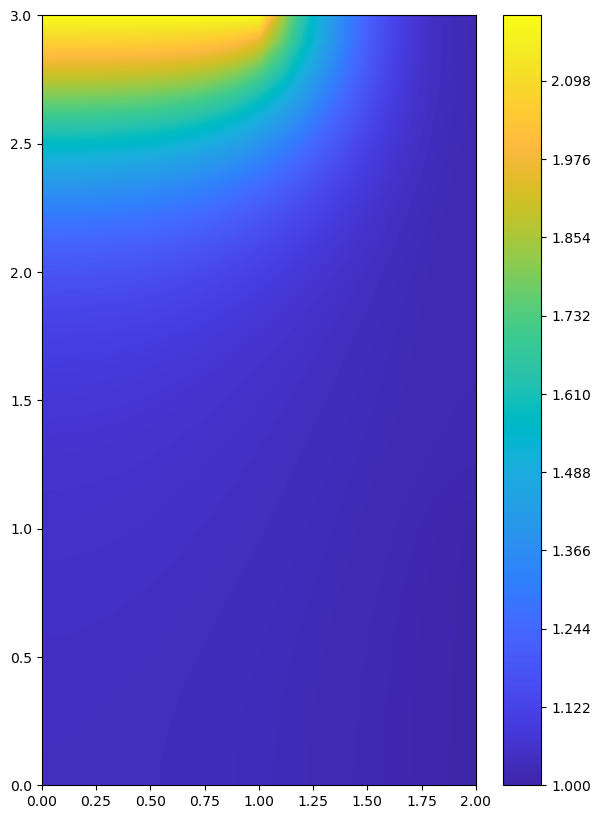

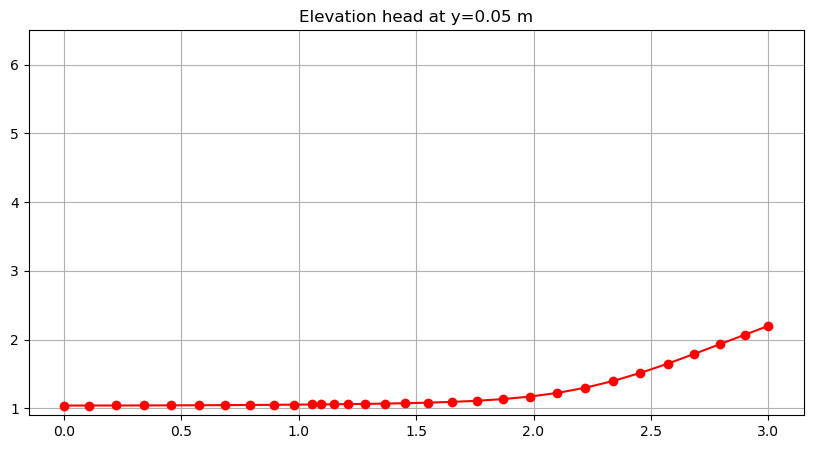

Time 0.5625
Iteration #0001, error L2 relative psi:    0.135902027
Iteration #0002, error L2 relative psi:    0.020846619
Iteration #0003, error L2 relative psi:    0.009878094
Iteration #0004, error L2 relative psi:    0.008037284
Iteration #0005, error L2 relative psi:    0.007335923
Iteration #0006, error L2 relative psi:    0.006694090
Iteration #0007, error L2 relative psi:    0.006116270
Iteration #0008, error L2 relative psi:    0.005584920
Iteration #0009, error L2 relative psi:    0.005099785
Iteration #0010, error L2 relative psi:    0.004656547
Iteration #0011, error L2 relative psi:    0.004251801
Iteration #0012, error L2 relative psi:    0.003882183
Iteration #0013, error L2 relative psi:    0.003544659
Iteration #0014, error L2 relative psi:    0.003236443
Iteration #0015, error L2 relative psi:    0.002954995
Iteration #0016, error L2 relative psi:    0.002697994
Iteration #0017, error L2 relative psi:    0.002463321
Iteration #0018, error L2 relative psi:    0.00224903

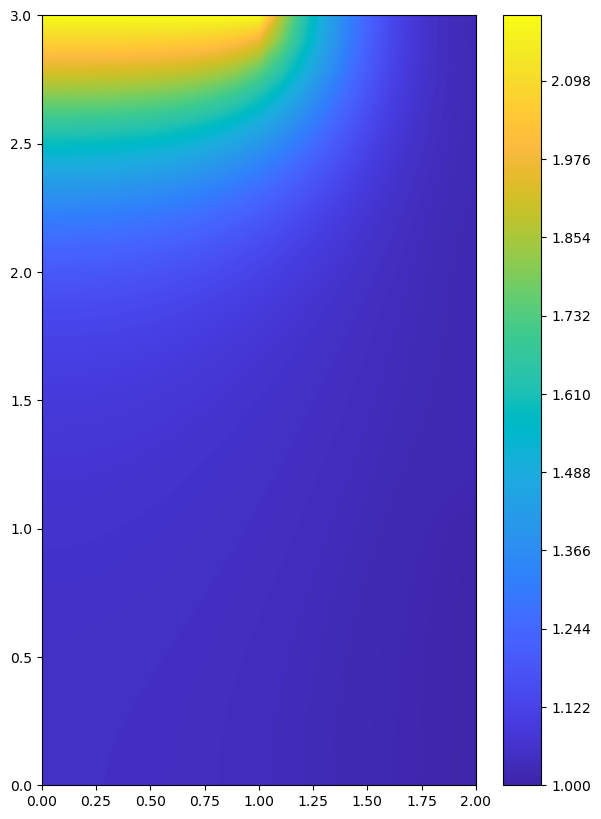

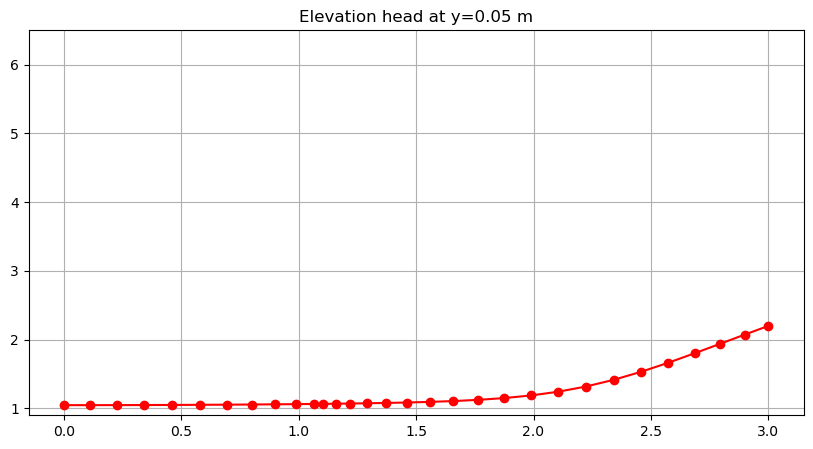

In [56]:
# Time Loop
for i in range(1, num_steps+1):
    current_time = i * dt
    print('Time ' + str(round(current_time, 5)))

    # Prepare the solution at the previous time step and ...
    prev = sol[-1].copy()
    
    debug_savers = [pp.Exporter(darcy_grid,    str(i) + '_sol_D', folder_name=os.path.join(output_directory, 'debug')), 
                    pp.Exporter(richards_grid, str(i) + '_sol_R', folder_name=os.path.join(output_directory, 'debug'))]
    save_step(sol[-1], debug_savers, 0)
        
    time_rhs = fixed_rhs.copy()

    # Non-linear loop
    for k in range(max_iterations_per_step):

        # Prepare the rhs
        rhs = time_rhs.copy()
       
        r_mass = richards_mass(prev[boundary_mask])

        rhs[richards_mask] += r_mass @ theta(sol[-1][richards_mask], sol[-1][boundary_mask]) / dt
        rhs[richards_mask] += (L * r_mass @ prev[richards_mask] - r_mass @ theta(prev[richards_mask], prev[boundary_mask]) ) / dt

        darcy_start = darcy_stifness(prev[boundary_mask])
        richards_start = richards_stifness(prev[boundary_mask], prev[richards_mask]) + L / dt * r_mass

        spp = sps.bmat([[               darcy_start,                           None,     darcy_restrict_to_boundary.T],
                        [                      None,                 richards_start, -richards_restrict_to_boundary.T],
                        [darcy_restrict_to_boundary, -richards_restrict_to_boundary,                             None]], format='csc')


        ls = pg.LinearSystem(spp, rhs)

        ls.flag_ess_bc(dirichlet_flag(current_time), dirichlet_value(current_time))

        current = ls.solve()


        # Compute the errors (with eta). Should I consider only psi? Should I compute the error on the "actual" psi values or on the dofs
        err = (current - prev)[:(darcy_dof + richards_dof)]
        abs_err_psi  = np.sqrt( err.T @ err )
        abs_err_prev = np.sqrt( prev[:(darcy_dof + richards_dof)].T @ prev[:(darcy_dof + richards_dof)] )

        print('Iteration #' + format(k+1, '0' + str(ceil(log10(max_iterations_per_step)) + 1) + 'd')
              + ', error L2 relative psi: ' + format(abs_err_psi, str(5 + ceil(log10(1 / abs_tol)) + 4)
                                                     + '.' + str(ceil(log10(1 / abs_tol)) + 4) + 'f') )


        save_step(current, debug_savers, k+1)
        
        if abs_err_psi < abs_tol + rel_tol * abs_err_prev:
            break
        else:
            prev = None
            prev = current.copy()

    print('')

    sol.append( current.copy() )
    save_step(sol[-1], savers, i)

    export_csv(i, sol[-1], plot_figure=True, plot_value=True)


for saver in savers:
    saver.write_pvd([t * dt for t in range(int(T/dt)+1)])